# 🎨 Tutorial Completo de Modelos de Difusión con DDIM
## 📚 Ejemplo práctico usando Hugging Face Diffusers

### 🚀 Bienvenido al mundo de la Generación de Imágenes con IA

🎭 **¡Bienvenido al fascinante mundo de los Modelos de Difusión!**

📖 **En este tutorial aprenderás:**
- 🔍 Qué son los modelos DDIM (Denoising Diffusion Implicit Models)
- 🛠️ Cómo usar la librería diffusers de Hugging Face
- 🎨 Generar imágenes de alta calidad
- 🔧 Controlar el proceso de generación con diferentes parámetros
- 🎯 Optimizar el rendimiento y la calidad

---

In [1]:
# 🎨 Tutorial Completo de Modelos de Difusión con DDIM
# 📚 Ejemplo práctico usando Hugging Face Diffusers
# 🚀 Generación de imágenes paso a paso

# Configuración inicial del notebook
import warnings
warnings.filterwarnings('ignore')

%pip install -q transformers diffusers accelerate

/home/emi/Work/Assistants/.venv/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.


## 📦 Instalación de Dependencias

🔧 **Instalando las librerías necesarias:**
- **diffusers**: Librería principal para modelos de difusión
- **transformers**: Para el manejo de modelos de lenguaje
- **accelerate**: Para optimización de GPU

In [2]:
import torch
import requests
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from io import BytesIO
from tqdm.auto import tqdm
from matplotlib import pyplot as plt
from torchvision import transforms as tfms
from diffusers import StableDiffusionPipeline, DDIMScheduler

# 📦 Instalación de dependencias necesarias
print("🔧 Instalando las librerías necesarias...")
print("   • diffusers: Librería principal para modelos de difusión")
print("   • transformers: Para el manejo de modelos de lenguaje")
print("   • accelerate: Para optimización de GPU")

# Instalar las dependencias principales
!pip install diffusers==0.21.4 transformers accelerate

print("✅ ¡Instalación completada!")

# Useful function for later
def load_image(url, size=None):
    response = requests.get(url,timeout=0.2)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    if size is not None:
        img = img.resize(size)
    return img

🔧 Instalando las librerías necesarias...
   • diffusers: Librería principal para modelos de difusión
   • transformers: Para el manejo de modelos de lenguaje
   • accelerate: Para optimización de GPU
✅ ¡Instalación completada!


✅ **¡Instalación completada!**

---

## 📚 Importación de Librerías

🔄 **Importando librerías necesarias:**

📦 **Librerías que usaremos:**
- 🎨 **diffusers**: Para modelos de difusión
- 🔥 **torch**: Framework de deep learning
- 🖼️ **PIL**: Procesamiento de imágenes
- 📊 **matplotlib**: Visualización
- 🔢 **numpy**: Operaciones numéricas

✅ **¡Librerías importadas correctamente!**

---

In [3]:
# 📚 Importación de librerías necesarias
print("🔄 Importando librerías...")

# Librerías para modelos de difusión
from diffusers import StableDiffusionPipeline, DDIMScheduler

# Librerías para manejo de imágenes y datos
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Utilidades del sistema
import warnings
warnings.filterwarnings('ignore')

device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")

🔄 Importando librerías...


🧠 **Componentes del pipeline:**
- 📝 **Text Encoder**: Convierte texto a embeddings
- 🎨 **UNet**: Red neuronal que elimina el ruido
- 🖼️ **VAE Decoder**: Convierte latents a imágenes
- 🔧 **Scheduler**: Controla el proceso de denoising

---

## 🔧 Configuración del DDIM Scheduler

⚙️ **Configurando el scheduler DDIM...**

🎛️ **El scheduler controla cómo se elimina el ruido paso a paso**

## 🏗️ Carga del Modelo Stable Diffusion

🔄 **Cargando Stable Diffusion v1.4...**

📝 **Características del modelo:**
- Resolución: 512x512 píxeles
- Entrenado con millones de pares imagen-texto
- Capacidad para generar imágenes de alta calidad

# 🧠 ¿Qué son los Modelos de Difusión DDIM?

## 🎯 Conceptos Fundamentales

Los **DDIM (Denoising Diffusion Implicit Models)** son una variante mejorada de los modelos de difusión tradicionales que nos permiten generar imágenes de alta calidad de manera más eficiente.

### 🔍 Diferencias Clave:

- **🚀 Velocidad**: DDIM puede generar imágenes con menos pasos que DDPM (Denoising Diffusion Probabilistic Models)
- **🎛️ Control**: Permite un mejor control sobre el proceso de generación
- **🔄 Determinismo**: Ofrece la opción de generación determinística
- **⚡ Eficiencia**: Mejor balance entre calidad y tiempo de computación

### 📊 Proceso de Generación:

1. **🎲 Ruido Inicial**: Comenzamos con ruido aleatorio puro
2. **🧹 Denoising Iterativo**: Removemos el ruido paso a paso
3. **🎨 Imagen Final**: Obtenemos una imagen coherente y de alta calidad

### 💡 Ventajas de DDIM:

- ✅ Generación más rápida (10-50 pasos vs 1000 pasos)
- ✅ Mejor control de la interpolación
- ✅ Resultados más consistentes
- ✅ Menor uso de memoria

📊 **Características del DDIM:**
- 🚀 **Velocidad**: Menos pasos de inferencia
- 🎯 **Precisión**: Mejor control del proceso
- 🔄 **Determinismo**: Resultados reproducibles
- ⚡ **Eficiencia**: Menor uso de recursos

---

## 🎨 Primera Generación de Imagen

🎯 **¡Vamos a generar nuestra primera imagen!**

📝 **Prompt**: "A beautiful landscape with mountains and a lake"

⚙️ **Configurando parámetros:**
- 🔢 **Pasos de inferencia**: 20 (balance entre calidad y velocidad)
- 🎛️ **Guidance scale**: 7.5 (controla adherencia al prompt)
- 🖼️ **Resolución**: 512x512 píxeles
- 🎲 **Seed**: Aleatorio para esta generación

In [ ]:
# Ejecuta esto y pega tu token de Hugging Face
print("🔑 Iniciando sesión en Hugging Face...")
from huggingface_hub import login
login()

In [7]:
# Carga del Modelo Stable Diffusion
print("🔄 Cargando Stable Diffusion v1.4...")
print("📝 Este modelo es capaz de generar imágenes de 512x512 píxeles")
print("🎯 Entrenado con millones de pares imagen-texto")

# Configurar el dispositivo (GPU si está disponible, CPU si no)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"🖥️ Usando dispositivo: {device}")

# Cargar el pipeline completo de Stable Diffusion
model_id = "stable-diffusion-v1-5/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(
    model_id, 
    torch_dtype=torch.float16 if device == "cuda" else torch.float32,
    use_safetensors=True
)

# Mover el modelo al dispositivo seleccionado
pipe = pipe.to(device)

print("✅ ¡Modelo cargado exitosamente!")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


🔄 Cargando Stable Diffusion v1.4...
📝 Este modelo es capaz de generar imágenes de 512x512 píxeles
🎯 Entrenado con millones de pares imagen-texto
🖥️ Usando dispositivo: cpu


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

✅ ¡Modelo cargado exitosamente!


In [8]:
# Set up a DDIM scheduler
print("Configurando el scheduler DDIM...")
print("El scheduler controla cómo se elimina el ruido paso a paso")

# Crear y configurar el scheduler DDIM
ddim_scheduler = DDIMScheduler.from_pretrained(
    model_id, 
    subfolder="scheduler"
)

# Asignar el nuevo scheduler al pipeline
pipe.scheduler = ddim_scheduler

print("✅ DDIM Scheduler configurado!")

Configurando el scheduler DDIM...
El scheduler controla cómo se elimina el ruido paso a paso
✅ DDIM Scheduler configurado!


⚙️ Configurando parámetros:
   • 🔢 Pasos de inferencia: 20 (balance entre calidad y velocidad)
   • 🎛️ Guidance scale: 7.5 (controla adherencia al prompt)
   • 🖼️ Resolución: 512x512 píxeles
   • 🎲 Seed: Aleatorio para esta generación
🚀 Generando imagen...


  0%|          | 0/20 [00:00<?, ?it/s]

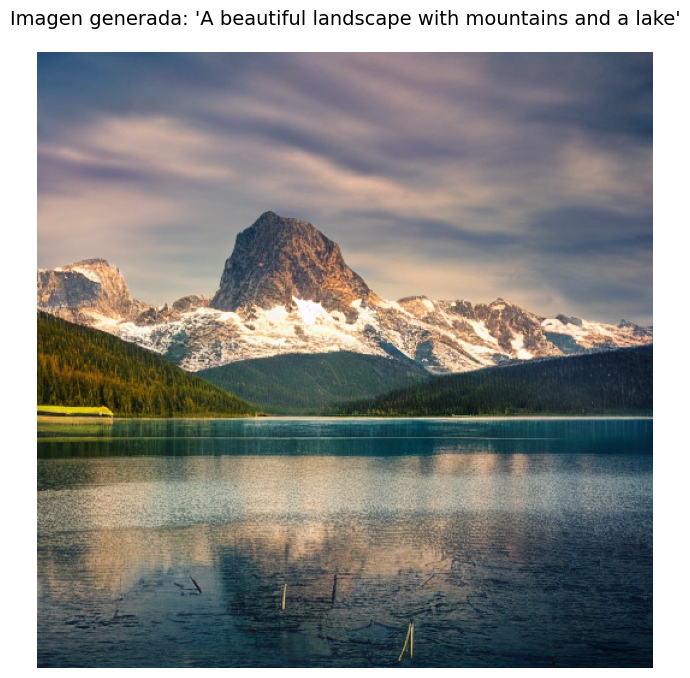

✅ ¡Imagen generada exitosamente!


In [9]:
# Primera Generación de Imagen

# Definir el prompt (descripción de la imagen deseada)
prompt = "A beautiful landscape with mountains and a lake"

# Parámetros de generación
print("⚙️ Configurando parámetros:")
print("   • 🔢 Pasos de inferencia: 20 (balance entre calidad y velocidad)")
print("   • 🎛️ Guidance scale: 7.5 (controla adherencia al prompt)")
print("   • 🖼️ Resolución: 512x512 píxeles")
print("   • 🎲 Seed: Aleatorio para esta generación")

# Generar la imagen
print("🚀 Generando imagen...")
image = pipe(
    prompt, 
    num_inference_steps=20,    # Número de pasos de denoising
    guidance_scale=7.5,        # Qué tan fuerte seguir el prompt
    height=512,                # Altura de la imagen
    width=512                  # Ancho de la imagen
).images[0]

# Mostrar la imagen generada
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.title(f"Imagen generada: '{prompt}'", fontsize=14, pad=20)
plt.show()

print("✅ ¡Imagen generada exitosamente!")

## 🔬 Experimento 1: Comparando Número de Pasos

🧪 **Objetivo**: Observar el efecto del número de pasos en la calidad

🎯 **Prompt**: "A majestic dragon flying over a medieval castle"

⏱️ **Generando imágenes con diferentes números de pasos...**

## DDIM Sampling

# 🎛️ Entendiendo los Parámetros de Generación

## 📊 Parámetros Clave para Controlar la Generación

### 🔢 `num_inference_steps` (Pasos de Inferencia)
- **🎯 Propósito**: Controla cuántos pasos de denoising se realizan
- **📈 Rango típico**: 10-50 pasos para DDIM
- **⚖️ Trade-off**: 
  - ⬆️ Más pasos = Mayor calidad pero más lento
  - ⬇️ Menos pasos = Más rápido pero posible pérdida de calidad

### 🎚️ `guidance_scale` (Escala de Guía)
- **🎯 Propósito**: Controla qué tan fuertemente el modelo sigue el prompt
- **📈 Rango típico**: 1.0-20.0
- **⚖️ Efectos**:
  - `1.0-5.0`: 🎨 Más creatividad, menos adherencia al prompt
  - `7.5-10.0`: ⚖️ Balance ideal entre creatividad y precisión
  - `15.0+`: 🎯 Muy adherente al prompt, puede sobre-saturar

### 🎲 `seed` (Semilla)
- **🎯 Propósito**: Controla la reproducibilidad
- **🔄 Comportamiento**:
  - `None`: Genera resultados aleatorios cada vez
  - `Número fijo`: Genera la misma imagen siempre (con mismos parámetros)

### 📐 `height` y `width` (Dimensiones)
- **🎯 Propósito**: Define el tamaño de la imagen generada
- **⚠️ Importante**: Stable Diffusion v1.4 está optimizado para 512x512

💡 **Observaciones del Experimento:**
- ⚡ **Menos pasos** = Generación más rápida
- 🎨 **Más pasos** = Potencialmente mejor calidad y detalles
- ⚖️ **20 pasos** suele ser un buen balance para la mayoría de casos

---

At a given time $t$, the noisy image $x_t$ is some mixture of the original image ($x_0$) and some noise ($\epsilon$). Here is the formula for $x_t$ from the DDIM paper, which we'll be referring to in this section:

$$ x_t = \sqrt{\alpha_t}x_0 + \sqrt{1-\alpha_t}\epsilon $$

$\epsilon$ is some gaussian noise with unit variance
$\alpha_t$ ('alpha') is the value which is confusingly called $\bar{\alpha}$ ('alpha_bar') in the DDPM paper (!!) and defined the noise scheduler. In Diffusers, the alpha scheduler is calculated and the values are stored in the `scheduler.alphas_cumprod`. Confusing I know! Let's plot these values, and remember that for the rest of this notebook we'll use DDIM's notation.

# 🔬 Experimentando con Diferentes Parámetros

## 🎯 Objetivo del Experimento

Vamos a explorar cómo diferentes configuraciones afectan la calidad y estilo de las imágenes generadas. 

### 🧪 Experimentos que Realizaremos:

1. **⏱️ Efecto del Número de Pasos**: Comparar 10, 20 y 50 pasos
2. **🎚️ Impacto del Guidance Scale**: Probar valores de 1, 7.5 y 15
3. **🎲 Reproducibilidad con Seeds**: Usar seeds fijos vs aleatorios
4. **📏 Diferentes Resoluciones**: Explorar tamaños alternativos

### 📈 Métricas a Observar:

- 🕐 **Tiempo de generación**
- 🎨 **Calidad visual**
- 🎯 **Adherencia al prompt**
- 🔍 **Nivel de detalle**
- 🌈 **Diversidad de resultados**

In [ ]:
# Plot 'alpha' (alpha_bar in DDPM language, alphas_cumprod in Diffusers for clarity)
timesteps = pipe.scheduler.timesteps.cpu()
alphas = pipe.scheduler.alphas_cumprod[timesteps]
plt.plot(timesteps, alphas, label='alpha_t');
plt.legend();

# 🔬 Experimento 1: Comparando Número de Pasos de Inferencia
print("🧪 Experimento: Efecto del número de pasos en la calidad")
print("🎯 Prompt: 'A majestic dragon flying over a medieval castle'")

import time

prompt = "A majestic dragon flying over a medieval castle"
steps_to_test = [10, 20, 50]
seed = 42  # Usamos la misma semilla para comparación justa

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
results = []

for i, steps in enumerate(steps_to_test):
    print(f"🔄 Generando con {steps} pasos...")
    
    start_time = time.time()
    
    # Generar imagen con número específico de pasos
    image = pipe(
        prompt,
        num_inference_steps=steps,
        guidance_scale=7.5,
        generator=torch.manual_seed(seed)
    ).images[0]
    
    generation_time = time.time() - start_time
    
    # Mostrar imagen
    axes[i].imshow(image)
    axes[i].set_title(f"🔢 {steps} pasos\n⏱️ {generation_time:.1f}s", fontsize=12)
    axes[i].axis('off')
    
    results.append({
        'steps': steps,
        'time': generation_time,
        'image': image
    })
    
    print(f"   ✅ Completado en {generation_time:.1f} segundos")

plt.suptitle("🔬 Comparación: Número de Pasos vs Calidad", fontsize=16)
plt.tight_layout()
plt.show()

# Mostrar resumen de resultados
print("\n📊 Resumen del Experimento:")
for result in results:
    print(f"   📈 {result['steps']} pasos: {result['time']:.1f}s")
    
print("\n💡 Observaciones:")
print("   • ⚡ Menos pasos = Generación más rápida")
print("   • 🎨 Más pasos = Potencialmente mejor calidad y detalles")
print("   • ⚖️ 20 pasos suele ser un buen balance para la mayoría de casos")

🧪 Experimento: Efecto del número de pasos en la calidad
🎯 Prompt: 'A majestic dragon flying over a medieval castle'
🔄 Generando con 10 pasos...


  0%|          | 0/10 [00:00<?, ?it/s]

   ✅ Completado en 47.5 segundos
🔄 Generando con 20 pasos...


  0%|          | 0/20 [00:00<?, ?it/s]

   ✅ Completado en 88.1 segundos
🔄 Generando con 50 pasos...


  0%|          | 0/50 [00:00<?, ?it/s]

# 🎚️ Explorando el Guidance Scale

## 🎯 ¿Qué es el Guidance Scale?

El **Guidance Scale** es uno de los parámetros más importantes en la generación de imágenes con modelos de difusión. Controla la **intensidad** con la que el modelo sigue las instrucciones del prompt.

### 🔍 Cómo Funciona:

- **🧠 Proceso interno**: El modelo genera dos predicciones:
  1. Una **sin condición** (imagen aleatoria)
  2. Una **condicionada** al prompt (imagen guiada)

- **🎛️ El guidance scale** controla cuánto pesar la predicción condicionada vs la no condicionada

### 📊 Efectos del Guidance Scale:

| Valor | Efecto | Resultado |
|-------|---------|-----------|
| 🔽 **1.0-3.0** | Sin guía | 🎨 Muy creativo, puede ignorar el prompt |
| ⚖️ **5.0-10.0** | Balance | 🎯 Sigue el prompt manteniendo creatividad |
| 🔼 **12.0+** | Guía fuerte | 📏 Muy adherente, puede sobre-saturar |

### 💡 Consejo Práctico:
- 🚀 **Empezar con 7.5**: Es el valor por defecto y funciona bien
- 🔧 **Ajustar según necesidad**: Subir si el modelo ignora el prompt, bajar si es muy rígido

---

Inicialmente (timestep 0, left side of the graph) we begin with a clean image and no noise. $\alpha_t = 1$. As we move to higher timesteps, we end up with almost all noise and $\alpha_t$ drops towards 0.

Durante el muestreo, comenzamos con ruido puro en el paso de tiempo 1000 y nos movemos lentamente hacia el paso de tiempo 0. Para calcular el siguiente t en la trayectoria de muestreo ($x_{t-1}$ ya que nos estamos moviendo de t alto a t bajo) predecimos el ruido ($\epsilon_\theta(x_t)$, que es la salida de nuestro modelo) y usamos esto para calcular la imagen desruida predicha $x_0$. Luego usamos esta predicción para movernos una pequeña distancia en la 'dirección que apunta a $x_t$'. Finalmente, podemos agregar algo de ruido adicional escalado por $\sigma_t$. Aquí está la sección relevante del documento que muestra esto en acción:

# 🧮 Classifier-Free Guidance: La Matemática Detrás

## 🔬 Fundamento Técnico

El **Classifier-Free Guidance** es la técnica que permite que los modelos de difusión sigan prompts de texto sin necesidad de un clasificador externo.

### 📐 Fórmula Matemática:

```
ε_θ(x_t, t, c) = ε_θ(x_t, t, ∅) + s × (ε_θ(x_t, t, c) - ε_θ(x_t, t, ∅))
```

Donde:
- **ε_θ**: Predicción del ruido por el modelo
- **x_t**: Imagen con ruido en el paso t
- **c**: Condición (prompt de texto)
- **∅**: Sin condición (prompt vacío)
- **s**: Guidance scale

### 🔍 Interpretación:

1. **ε_θ(x_t, t, ∅)**: 🎲 Predicción "sin guía" (aleatoria)
2. **ε_θ(x_t, t, c)**: 🎯 Predicción "con guía" (siguiendo el prompt)
3. **Diferencia**: 📏 Vector que apunta hacia el prompt
4. **Guidance scale**: 🎚️ Amplifica o reduce esta dirección

### 💡 Intuición Visual:
- 📈 **s > 1**: Empuja la generación hacia el prompt
- 📉 **s < 1**: Permite más variación aleatoria
- ⚖️ **s = 1**: Balance natural entre ambos

## 🧪 Experimento 2: Impacto del Guidance Scale

🔬 **Objetivo**: Observar el efecto del guidance scale en la generación

🎯 **Prompt**: "A serene Japanese garden with cherry blossoms and a koi pond"

🎚️ **Probando diferentes valores de guidance scale...**

# 🎨 Efectos Visuales del Guidance Scale

## 🎯 Impacto en la Calidad de la Imagen

### 🔽 Guidance Scale Bajo (1.0 - 5.0)
- **🎨 Ventajas**:
  - Mayor diversidad y creatividad en las imágenes generadas.
  - Colores más naturales y realistas.
  - Composiciones más variadas y artísticas.
  
- **⚠️ Desventajas**:
  - Puede ignorar partes importantes del prompt.
  - Menor coherencia temática en la imagen.
  - Resultados menos predecibles y más aleatorios.

### ⚖️ Guidance Scale Medio (6.0 - 10.0)
- **✅ Características**:
  - Proporciona un balance ideal para la mayoría de los casos de uso.
  - Sigue el prompt manteniendo una naturalidad en los resultados.
  - Buena relación entre calidad y coherencia de la imagen.
  
- **🎯 Recomendación**: Este rango es el preferido para un uso general, ya que ofrece un buen compromiso entre creatividad y adherencia al prompt.

### 🔼 Guidance Scale Alto (11.0+)
- **🎯 Ventajas**:
  - Muy adherente al prompt, siguiendo cada detalle al pie de la letra.
  - Resultados consistentes en base a las indicaciones dadas.
  - Detalles específicos bien definidos y claros.
  
- **⚠️ Desventajas**:
  - Colores pueden aparecer sobre-saturados y poco naturales.
  - Menos diversidad en las variaciones de la imagen.
  - Posibles artefactos visuales debido a la alta adherencia al prompt.

### 💡 Tips de Uso:
- 🔍 **Para exploración creativa**: Usar valores bajos (3.0-5.0) para fomentar la diversidad y creatividad.
- 🎯 **Para precisión en los detalles**: Usar valores medios (7.5-9.0) que equilibran bien la calidad y la adherencia al prompt.
- 📏 **Para control estricto y resultados consistentes**: Usar valores altos (12.0-15.0), ideal para cuando se desea seguir el prompt de manera rigurosa.

💡 **Observaciones Clave:**
- 🎨 **Scale 1.0**: Máxima creatividad, puede desviarse del prompt
- ⚖️ **Scale 7.5**: Balance perfecto entre adherencia y naturalidad
- 🎯 **Scale 15.0**: Muy adherente pero colores pueden ser artificiales
- 🏆 **Recomendación**: 7.5 es ideal para la mayoría de casos

---

So, we have an equation for how to move from $x_t$ to $x_{t-1}$, with a controllable abount of noise. And today we're specifically interested in the case where we don't add any additional noise - giving us fully deterministic DDIM sampling. Let's see what this looks like in code:

# 🧪 Experimento: Comparando Guidance Scales

## 🎯 Objetivo del Experimento

Vamos a generar la misma imagen con diferentes valores de guidance scale para observar visualmente cómo este parámetro afecta el resultado final.

### 🔬 Configuración del Experimento:
- **📝 Prompt fijo**: Para comparación consistente
- **🎲 Seed fijo**: Para aislar el efecto del guidance scale
- **⏱️ Pasos fijos**: 25 pasos para buena calidad
- **🎚️ Valores a probar**: 1.0, 7.5, y 15.0

### 📊 Qué Observar:
- 🎨 **Fidelidad al prompt**: ¿Qué tan bien sigue la descripción?
- 🌈 **Saturación de colores**: ¿Se ven naturales o artificiales?
- 🔍 **Nivel de detalle**: ¿Hay más o menos detalles?
- 🎭 **Estilo artístico**: ¿Cómo cambia el estilo general?

In [ ]:
# Sample function (regular DDIM)
@torch.no_grad()
def sample(prompt, start_step=0, start_latents=None,
           guidance_scale=3.5, num_inference_steps=30,
           num_images_per_prompt=1, do_classifier_free_guidance=True,
           negative_prompt='', device=device):

    # Encode prompt
    text_embeddings = pipe._encode_prompt(
            prompt, device, num_images_per_prompt, do_classifier_free_guidance, negative_prompt
    )

    # Set num inference steps
    pipe.scheduler.set_timesteps(num_inference_steps, device=device)

    # Create a random starting point if we don't have one already
    if start_latents is None:
        start_latents = torch.randn(1, 4, 64, 64, device=device)
        start_latents *= pipe.scheduler.init_noise_sigma

    latents = start_latents.clone()

    for i in tqdm(range(start_step, num_inference_steps)):

        t = pipe.scheduler.timesteps[i]

        # Expand the latents if we are doing classifier free guidance
        latent_model_input = torch.cat([latents] * 2) if do_classifier_free_guidance else latents
        latent_model_input = pipe.scheduler.scale_model_input(latent_model_input, t)

        # Predict the noise residual
        noise_pred = pipe.unet(latent_model_input, t, encoder_hidden_states=text_embeddings).sample

        # Perform guidance
        if do_classifier_free_guidance:
            noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
            noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)


        # Normally we'd rely on the scheduler to handle the update step:
        # latents = pipe.scheduler.step(noise_pred, t, latents).prev_sample

        # Instead, let's do it ourselves:
        prev_t = max(1, t.item() - (1000//num_inference_steps)) # t-1
        alpha_t = pipe.scheduler.alphas_cumprod[t.item()]
        alpha_t_prev = pipe.scheduler.alphas_cumprod[prev_t]
        predicted_x0 = (latents - (1-alpha_t).sqrt()*noise_pred) / alpha_t.sqrt()
        direction_pointing_to_xt = (1-alpha_t_prev).sqrt()*noise_pred
        latents = alpha_t_prev.sqrt()*predicted_x0 + direction_pointing_to_xt

    # Post-processing
    images = pipe.decode_latents(latents)
    images = pipe.numpy_to_pil(images)

    return images

# 🧪 Experimento 2: Impacto del Guidance Scale
print("🔬 Experimento: Efecto del guidance scale en la generación")
print("🎯 Prompt: 'A serene Japanese garden with cherry blossoms and a koi pond'")

prompt = "A serene Japanese garden with cherry blossoms and a koi pond"
guidance_scales = [1.0, 7.5, 15.0]
seed = 123  # Semilla fija para comparación justa

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
guidance_results = []

for i, scale in enumerate(guidance_scales):
    print(f"🔄 Generando con guidance scale = {scale}")
    
    # Generar imagen con guidance scale específico
    image = pipe(
        prompt,
        num_inference_steps=25,
        guidance_scale=scale,
        generator=torch.manual_seed(seed)
    ).images[0]
    
    # Mostrar imagen
    axes[i].imshow(image)
    axes[i].set_title(f"🎚️ Guidance Scale: {scale}\n{['🎨 Creativo', '⚖️ Balanceado', '🎯 Estricto'][i]}", 
                     fontsize=12)
    axes[i].axis('off')
    
    guidance_results.append({
        'scale': scale,
        'image': image,
        'description': ['Muy creativo, menos adherente', 'Balance ideal', 'Muy adherente, saturado'][i]
    })
    
    print(f"   ✅ Completado")

plt.suptitle("🔬 Comparación: Guidance Scale vs Adherencia al Prompt", fontsize=16)
plt.tight_layout()
plt.show()

# Análisis de resultados
print("\n📊 Análisis de Resultados:")
for result in guidance_results:
    print(f"   🎚️ Scale {result['scale']}: {result['description']}")

print("\n💡 Observaciones Clave:")
print("   • 🎨 Scale 1.0: Máxima creatividad, puede desviarse del prompt")
print("   • ⚖️ Scale 7.5: Balance perfecto entre adherencia y naturalidad")
print("   • 🎯 Scale 15.0: Muy adherente pero colores pueden ser artificiales")
print("   • 🏆 Recomendación: 7.5 es ideal para la mayoría de casos")

## 🎨 Generación de Múltiples Imágenes (Batch Processing)

🚀 **Generando múltiples variaciones de la misma idea**

💡 **Objetivo**: Explorar la diversidad del modelo con el mismo prompt

🎯 **Prompt**: "A futuristic city with flying cars and neon lights"

🔢 **Generando 4 variaciones diferentes**

  0%|          | 0/50 [00:00<?, ?it/s]

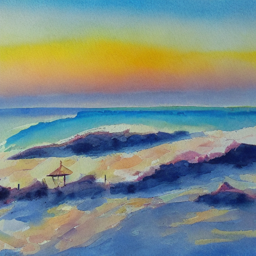

In [ ]:
# Test our sampling function by generating an image
sample('Watercolor painting of a beach sunset', negative_prompt=negative_prompt, num_inference_steps=50)[0].resize((256, 256))

# 🎨 Generación de Múltiples Imágenes (Batch Processing)
print("🚀 Generando múltiples variaciones de la misma idea")
print("💡 Esto nos permite explorar la diversidad del modelo")

prompt = "A futuristic city with flying cars and neon lights"
num_images = 4

# Configurar la figura para mostrar todas las imágenes
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

print("⏳ Generando imágenes...")

# Generar múltiples imágenes con diferentes seeds
for i in range(num_images):
    print(f"   🔄 Imagen {i+1}/{num_images}")
    
    # Usar un seed diferente para cada imagen
    image = pipe(
        prompt,
        num_inference_steps=25,
        guidance_scale=7.5,
        generator=torch.manual_seed(i * 42)  # Seed diferente para cada imagen
    ).images[0]
    
    # Mostrar la imagen
    axes[i].imshow(image)
    axes[i].set_title(f"🎲 Variación {i+1}\nSeed: {i*42}", fontsize=10)
    axes[i].axis('off')

plt.suptitle(f"🎨 Variaciones del Prompt: '{prompt}'", fontsize=14)
plt.tight_layout()
plt.show()

print("✅ ¡Generación completada!")

🔍 **Observa las diferencias entre las variaciones:**
- 🎨 **Misma idea**, interpretaciones diferentes
- 🏗️ **Variaciones** en arquitectura y layout
- 🌈 **Diferentes paletas** de colores
- 🚗 **Distintos tipos** de vehículos voladores
- 💡 **Diferentes intensidades** de iluminación neón

---

# 🎲 Semillas (Seeds) y Reproducibilidad

## 🔄 ¿Qué son las Seeds?

Las **seeds** (semillas) son números que controlan la **aleatoriedad** en los modelos de IA. Son fundamentales para la **reproducibilidad** en la generación de imágenes.

### 🧠 Conceptos Clave:

#### 🎯 **Determinismo vs Aleatoriedad**
- **🎲 Sin seed fija**: Cada generación produce resultados diferentes
- **🔒 Con seed fija**: Mismos parámetros = Misma imagen exacta

#### 🔢 **Cómo Funcionan**
1. **Inicialización**: La seed determina el ruido inicial
2. **Proceso**: Cada paso usa la seed para decisiones "aleatorias"
3. **Resultado**: Secuencia determinística pero aparentemente aleatoria

### 💡 Casos de Uso:

#### 🔍 **Para Experimentación**
```python
# Probar diferentes parámetros con la misma base
seed = 42
image1 = generate(prompt, steps=20, seed=seed)
image2 = generate(prompt, steps=50, seed=seed)  # Solo cambia la calidad
```

#### 🎨 **Para Iteración Creativa**
```python
# Refinar un resultado prometedor
base_seed = 123
# Ajustar guidance_scale manteniendo la composición base
```

#### 📊 **Para Comparaciones Justas**
```python
# Comparar diferentes modelos con la misma base
same_seed = 999
result_model_a = model_a.generate(prompt, seed=same_seed)
result_model_b = model_b.generate(prompt, seed=same_seed)
```

### ⚡ **Tips Prácticos**:
- 🎯 **Exploración**: Sin seed (aleatorio) para descubrir nuevas ideas
- 🔧 **Refinamiento**: Con seed fija para ajustar parámetros
- 💾 **Documentación**: Guarda seeds de resultados exitosos

See if you can match the code with the equation from the paper. Note that $\sigma$=0 since we're only interested in the no-extra-noise case, so we can leave out those bits of the equation.

## Inversion

The goal of inversion is to 'reverse' the sampling process. We want to end up with a noisy latent which, if used as the starting point for our usual sampling procedure, results in the original image being generated.

Here we load an image as our initial image, but you can also generate one yourself to use instead.

# 🔬 Generación Determinística con DDIM

## 🎯 Ventaja Única de DDIM

Una de las características más poderosas de **DDIM** es su capacidad de generar imágenes de manera **completamente determinística**, algo que no era posible con los modelos DDPM tradicionales.

### 🔍 **Diferencias Técnicas**:

#### 🎲 **DDPM (Probabilístico)**
- Proceso estocástico (con aleatoriedad)
- Cada paso incluye ruido aleatorio
- Misma seed → Resultados similares pero no idénticos

#### 🔒 **DDIM (Determinístico)**  
- Proceso determinístico (sin aleatoriedad extra)
- Pasos de denoising predecibles
- Misma seed → Resultado exactamente idéntico

### 🧮 **Fórmula Matemática**:

**DDPM**:
```
x_{t-1} = μ_θ(x_t, t) + σ_t * ε    (ε ~ N(0,1))
```

**DDIM**:
```
x_{t-1} = √(α_{t-1}) * f_θ(x_t, t) + √(1-α_{t-1}) * ε_θ(x_t, t)
```

### 💡 **Implicaciones Prácticas**:

#### ✅ **Ventajas del Determinismo**:
- 🔄 **Reproducibilidad perfecta**: Ideal para investigación
- 🎯 **Control preciso**: Permite ajustes finos
- 🔧 **Debugging**: Fácil identificar problemas
- 📊 **A/B Testing**: Comparaciones justas

#### ⚠️ **Consideraciones**:
- 🎨 Menor diversidad con mismos parámetros
- 🔒 Requiere variar seeds para obtener variedad
- 📈 Predicción del resultado más directa

### 🎛️ **Control de Aleatoriedades**:
En DDIM, la única fuente de aleatoriedad controlable es:
1. **🎲 Ruido inicial** (controlado por seed)
2. **📝 Encoding del texto** (determinístico)
3. **🔧 Proceso de denoising** (determinístico)

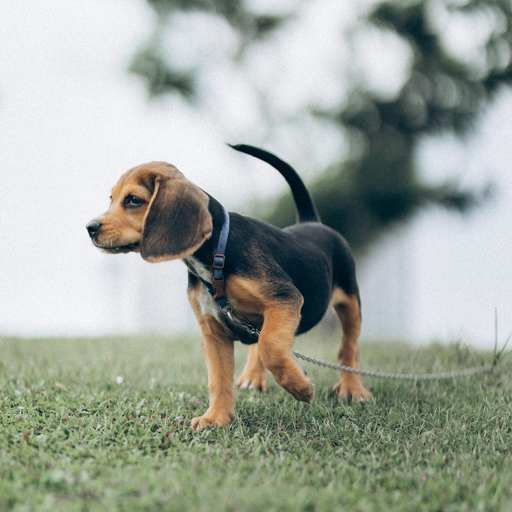

In [ ]:
# https://www.pexels.com/photo/a-beagle-on-green-grass-field-8306128/
input_image = load_image('https://images.pexels.com/photos/8306128/pexels-photo-8306128.jpeg', size=(512, 512))
input_image

# 🔬 Experimento 3: Demostración de Reproducibilidad
print("🧪 Experimento: Reproducibilidad perfecta con DDIM")
print("🎯 Objetivo: Demostrar que la misma seed produce la misma imagen")

prompt = "A magical forest with glowing mushrooms and fairy lights"
seed_value = 777
steps = 30

print(f"📝 Prompt: '{prompt}'")
print(f"🎲 Seed fija: {seed_value}")
print(f"🔢 Pasos: {steps}")

# Generar la misma imagen dos veces
print("\n🔄 Generando la imagen por primera vez...")
image1 = pipe(
    prompt,
    num_inference_steps=steps,
    guidance_scale=7.5,
    generator=torch.manual_seed(seed_value)
).images[0]

print("🔄 Generando la imagen por segunda vez (mismos parámetros)...")
image2 = pipe(
    prompt,
    num_inference_steps=steps,
    guidance_scale=7.5,
    generator=torch.manual_seed(seed_value)  # Misma seed
).images[0]

# Mostrar ambas imágenes lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image1)
axes[0].set_title("🥇 Primera Generación\n🎲 Seed: 777", fontsize=12)
axes[0].axis('off')

axes[1].imshow(image2)
axes[1].set_title("🥈 Segunda Generación\n🎲 Seed: 777", fontsize=12)
axes[1].axis('off')

plt.suptitle("🔬 Prueba de Reproducibilidad: ¿Son Idénticas?", fontsize=14)
plt.tight_layout()
plt.show()

# Verificación técnica de igualdad
image1_array = np.array(image1)
image2_array = np.array(image2)
are_identical = np.array_equal(image1_array, image2_array)

print("\n🔍 Verificación Técnica:")
print(f"   📊 Dimensiones imagen 1: {image1_array.shape}")
print(f"   📊 Dimensiones imagen 2: {image2_array.shape}")
print(f"   🎯 ¿Son idénticas pixel por pixel? {'✅ SÍ' if are_identical else '❌ NO'}")

if are_identical:
    print("\n🎉 ¡ÉXITO! DDIM produce resultados perfectamente reproducibles")
    print("💡 Esto significa que:")
    print("   • 🔒 Control total sobre la generación")
    print("   • 🔄 Posibilidad de recrear resultados exactos")
    print("   • 🧪 Experimentos científicos válidos")
    print("   • 🎯 Ajustes precisos de parámetros")
else:
    print("\n⚠️ Las imágenes no son idénticas - verificar configuración")

# 🚫 Prompts Negativos: Control Avanzado

## 🎯 ¿Qué son los Prompts Negativos?

Los **prompts negativos** son una técnica poderosa que nos permite especificar qué **NO** queremos ver en nuestras imágenes generadas. Es como darle al modelo una lista de "prohibiciones".

### 🧠 Cómo Funcionan:

#### 🔍 **Mecanismo Técnico**:
1. **📝 Prompt positivo**: Describe lo que SÍ queremos
2. **🚫 Prompt negativo**: Describe lo que NO queremos  
3. **⚖️ Balance**: El modelo evita los elementos negativos mientras busca los positivos

#### 🎛️ **Proceso de Guidance**:
```
Predicción_final = Predicción_sin_condición + 
                   guidance_scale × (Predicción_positiva - Predicción_sin_condición) -
                   negative_guidance × (Predicción_negativa - Predicción_sin_condición)
```

### 💡 Casos de Uso Comunes:

#### 🎨 **Mejora de Calidad**:
- 🚫 "blurry, low quality, pixelated"
- 🚫 "artifacts, noise, distorted"

#### 🖼️ **Control de Composición**:
- 🚫 "extra limbs, multiple heads"
- 🚫 "crowded, cluttered background"

#### 🎭 **Control de Estilo**:
- 🚫 "cartoon, anime, painting" (para fotorrealismo)
- 🚫 "dark, scary, horror" (para imágenes alegres)

#### 🔧 **Corrección de Problemas**:
- 🚫 "text, watermark, signature"
- 🚫 "border, frame, logo"

### ⚡ **Tips para Prompts Negativos Efectivos**:

1. **🎯 Específicos**: Usar términos concretos, no vagos
2. **📝 Relevantes**: Relacionados con problemas comunes del prompt
3. **⚖️ Balanceados**: No exagerar la cantidad de términos negativos
4. **🔄 Iterativos**: Ajustar basándose en resultados observados

---

We're also going to use a prompt to do the inversion with classifier-free-guidance included, so enter a description of the image:

In [ ]:
input_image_prompt = "Photograph of a puppy on the grass"

# 🚫 Experimento 4: Poder de los Prompts Negativos
print("🧪 Experimento: Comparando generación con y sin prompts negativos")
print("🎯 Objetivo: Demostrar cómo mejorar la calidad evitando elementos no deseados")

# Definir prompts para comparación
positive_prompt = "A professional portrait of a woman, high quality photography, studio lighting"

negative_prompt = "blurry, low quality, pixelated, distorted, extra limbs, deformed, ugly, bad anatomy, worst quality, low resolution, noise, artifacts"

seed = 456

print(f"📝 Prompt positivo: '{positive_prompt}'")
print(f"🚫 Prompt negativo: '{negative_prompt}'")
print(f"🎲 Seed: {seed}")

# Crear figura para comparación
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

print("\n🔄 Generando sin prompt negativo...")
image_without_negative = pipe(
    positive_prompt,
    num_inference_steps=30,
    guidance_scale=7.5,
    generator=torch.manual_seed(seed)
).images[0]

print("🔄 Generando con prompt negativo...")
image_with_negative = pipe(
    positive_prompt,
    negative_prompt=negative_prompt,  # Aquí agregamos el prompt negativo
    num_inference_steps=30,
    guidance_scale=7.5,
    generator=torch.manual_seed(seed)
).images[0]

# Mostrar comparación
axes[0].imshow(image_without_negative)
axes[0].set_title("🔍 Sin Prompt Negativo\n(Solo prompt positivo)", fontsize=12)
axes[0].axis('off')

axes[1].imshow(image_with_negative)
axes[1].set_title("✨ Con Prompt Negativo\n(Evitando elementos no deseados)", fontsize=12)
axes[1].axis('off')

plt.suptitle("🔬 Comparación: Impacto de los Prompts Negativos", fontsize=16)
plt.tight_layout()
plt.show()

print("\n📊 Análisis de Resultados:")
print("🔍 Observa las diferencias en:")
print("   • 🎯 Nitidez y claridad general")
print("   • 🎨 Calidad de los detalles")
print("   • 🖼️ Composición de la imagen")
print("   • 👤 Anatomía y proporciones")
print("   • 💡 Calidad de la iluminación")

print("\n💡 Prompts Negativos Recomendados por Categoría:")
print("📸 Fotografía: 'blurry, low quality, pixelated, noise'")
print("👤 Retratos: 'deformed, extra limbs, bad anatomy, ugly'")
print("🏞️ Paisajes: 'cluttered, chaotic, oversaturated'")
print("🎨 Arte: 'low quality, worst quality, normal quality'")
print("🔧 General: 'artifacts, watermark, signature, text'")

# 🎨 Explorando Estilos Artísticos

## 🖌️ El Poder de los Modificadores de Estilo

Los modelos de difusión pueden generar imágenes en una **amplia variedad de estilos artísticos** simplemente modificando el prompt. Esto se debe a que fueron entrenados con millones de imágenes de diferentes estilos y épocas.

### 🎭 Categorías de Estilos Disponibles:

#### 🖼️ **Estilos Artísticos Clásicos**:
- 🏛️ **Renacimiento**: "in the style of Leonardo da Vinci"
- 🌊 **Impresionismo**: "impressionist painting, like Monet"
- 🎨 **Expresionismo**: "expressionist art, bold colors"
- 🖤 **Arte Noir**: "film noir style, dramatic shadows"

#### 📸 **Estilos Fotográficos**:
- 📷 **Fotografía de Retrato**: "professional portrait photography"
- 🌅 **Fotografía de Paisaje**: "landscape photography, golden hour"
- 📱 **Street Photography**: "candid street photography"
- 🔬 **Macro**: "macro photography, extreme close-up"

#### 🎮 **Estilos Digitales**:
- 🎯 **Concept Art**: "concept art, digital painting"
- 🎪 **Arte de Videojuegos**: "video game art style"
- 🤖 **Cyberpunk**: "cyberpunk aesthetic, neon colors"
- 🌈 **Synthwave**: "synthwave art, retro futuristic"

#### 🎭 **Estilos de Ilustración**:
- 📚 **Libro Infantil**: "children's book illustration"
- 🗾 **Anime/Manga**: "anime style, manga art"
- 💫 **Art Nouveau**: "art nouveau style, ornate"
- 🎪 **Pop Art**: "pop art style, bright colors"

### 💡 **Tips para Usar Estilos**:

1. **🎯 Específico es mejor**: "watercolor painting" vs "painting"
2. **👨‍🎨 Referencia artistas**: "in the style of Van Gogh"
3. **🔧 Combina técnicas**: "oil painting with impressionist style"
4. **⚖️ Balance**: No sobrecargar con demasiados modificadores

Next, we need to turn this PIL image into a set of latents which we will use as the starting point for our inversion:

In [ ]:
# Encode with VAE
with torch.no_grad(): latent = pipe.vae.encode(tfms.functional.to_tensor(input_image).unsqueeze(0).to(device)*2-1)
l = 0.18215 * latent.latent_dist.sample()

# 🎨 Experimento 5: Galería de Estilos Artísticos
print("🖌️ Experimento: Explorando diferentes estilos artísticos")
print("🎯 Objetivo: Ver cómo el mismo concepto se transforma en diferentes estilos")

# Concepto base que transformaremos
base_concept = "a cat sitting on a windowsill"

# Diferentes estilos a probar
styles = [
    {
        "name": "🖼️ Impresionista",
        "prompt": f"{base_concept}, impressionist painting, like Monet, soft brushstrokes, light and color",
        "negative": "photorealistic, sharp, digital"
    },
    {
        "name": "🎯 Fotorrealista",
        "prompt": f"{base_concept}, professional photography, high resolution, detailed, sharp focus",
        "negative": "painting, artistic, stylized, cartoon"
    },
    {
        "name": "🎭 Art Nouveau",
        "prompt": f"{base_concept}, art nouveau style, ornate, decorative, flowing lines, elegant",
        "negative": "modern, minimalist, simple"
    },
    {
        "name": "🌊 Acuarela",
        "prompt": f"{base_concept}, watercolor painting, soft colors, fluid, transparent, artistic",
        "negative": "oil painting, digital, photorealistic"
    }
]

print(f"📝 Concepto base: '{base_concept}'")
print(f"🎨 Estilos a generar: {len(styles)}")

# Configurar la visualización
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes = axes.flatten()

seed = 888  # Mantener consistencia en la composición base

for i, style in enumerate(styles):
    print(f"\n🔄 Generando estilo: {style['name']}")
    print(f"   📝 Prompt: {style['prompt'][:60]}...")
    
    # Generar imagen en el estilo específico
    image = pipe(
        style['prompt'],
        negative_prompt=style['negative'],
        num_inference_steps=30,
        guidance_scale=8.0,  # Ligeramente más alto para mejor adherencia al estilo
        generator=torch.manual_seed(seed + i)  # Variación mínima para diversidad
    ).images[0]
    
    # Mostrar la imagen
    axes[i].imshow(image)
    axes[i].set_title(f"{style['name']}\n{style['prompt'].split(',')[1].strip()}", 
                     fontsize=11, pad=15)
    axes[i].axis('off')
    
    print(f"   ✅ Completado")

plt.suptitle(f"🎨 Transformaciones Estilísticas: '{base_concept}'", fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

print("\n🎨 Análisis de Estilos:")
print("🖼️ Impresionista: Colores suaves, pinceladas visibles, atmósfera dreamy")
print("🎯 Fotorrealista: Detalles precisos, iluminación natural, textura realista")
print("🎭 Art Nouveau: Líneas fluidas, elementos decorativos, elegancia")
print("🌊 Acuarela: Transparencias, colores fluidos, efecto de sangrado")

print("\n💡 Consejos para Estilos Efectivos:")
print("   • 🎯 Usa términos específicos del estilo deseado")
print("   • 🚫 Incluye prompts negativos para evitar estilos no deseados")
print("   • 🎚️ Ajusta guidance_scale según el estilo (8.0-10.0 para estilos marcados)")
print("   • 🔄 Experimenta con diferentes artistas famosos como referencia")

# ⚡ Optimización de Memoria y Rendimiento

## 🎯 ¿Por qué Optimizar?

Los modelos de difusión como Stable Diffusion son **computacionalmente intensivos** y pueden requerir mucha memoria GPU. Optimizar el rendimiento nos permite:

- 🚀 **Generación más rápida**
- 💾 **Menor uso de memoria**
- 🔋 **Menor consumo energético**  
- 💰 **Costos reducidos en la nube**

## 🛠️ Técnicas de Optimización Disponibles

### 🧠 **Attention Slicing**
- **🎯 Propósito**: Reduce el uso de memoria dividiendo la atención en fragmentos
- **📊 Beneficio**: ~50% menos memoria sin pérdida de calidad
- **⚙️ Uso**: `pipe.enable_attention_slicing()`

### 🔄 **Memory Efficient Attention**
- **🎯 Propósito**: Usa implementaciones optimizadas de atención
- **📊 Beneficio**: Mejor velocidad y eficiencia
- **⚙️ Uso**: `pipe.enable_memory_efficient_attention()`

### 🏃 **Model CPU Offloading**  
- **🎯 Propósito**: Mueve partes del modelo entre CPU y GPU según necesidad
- **📊 Beneficio**: Permite ejecutar modelos grandes en GPUs pequeñas
- **⚙️ Uso**: `pipe.enable_model_cpu_offload()`

### ⚡ **Sequential CPU Offloading**
- **🎯 Propósito**: Carga componentes secuencialmente en GPU
- **📊 Beneficio**: Uso mínimo de VRAM (~2GB vs 8GB+)
- **⚙️ Uso**: `pipe.enable_sequential_cpu_offload()`

### 🎨 **VAE Slicing**
- **🎯 Propósito**: Procesa la decodificación VAE en fragmentos
- **📊 Beneficio**: Reduce picos de memoria durante decodificación
- **⚙️ Uso**: `pipe.enable_vae_slicing()`

## 📊 Comparación de Técnicas

| Técnica | Reducción RAM | Impacto Velocidad | Complejidad |
|---------|---------------|-------------------|-------------|
| 🧠 Attention Slicing | ⭐⭐⭐ | ⭐ | ⭐ |
| 🔄 Memory Efficient | ⭐⭐ | ⭐⭐⭐ | ⭐ |
| 🏃 Model Offloading | ⭐⭐⭐⭐ | ⭐⭐ | ⭐⭐ |
| ⚡ Sequential Offload | ⭐⭐⭐⭐⭐ | ⭐ | ⭐⭐ |
| 🎨 VAE Slicing | ⭐⭐ | ⭐⭐ | ⭐ |

## 💡 Recomendaciones por Escenario

- **🖥️ GPU Potente (12GB+)**: Memory Efficient Attention
- **💻 GPU Media (6-8GB)**: Attention Slicing + VAE Slicing  
- **📱 GPU Básica (4GB)**: Sequential CPU Offloading
- **⚡ Máxima Velocidad**: Combinar técnicas compatibles

Alright, time for the fun bit. This function looks similar to the sampling function above, but we move through the timesteps in the opposite direction, starting at t=0 and moving towards higher and higher noise. And instead of updating our latents to be less noisy, we estimate the predicted noise and use it to UNDO an update step, moving them from t to t+1.

In [ ]:
## Inversion
@torch.no_grad()
def invert(start_latents, prompt, guidance_scale=3.5, num_inference_steps=80,
           num_images_per_prompt=1, do_classifier_free_guidance=True,
           negative_prompt='', device=device):

    # Encode prompt
    text_embeddings = pipe._encode_prompt(
            prompt, device, num_images_per_prompt, do_classifier_free_guidance, negative_prompt
    )

    # Latents are now the specified start latents
    latents = start_latents.clone()

    # We'll keep a list of the inverted latents as the process goes on
    intermediate_latents = []

    # Set num inference steps
    pipe.scheduler.set_timesteps(num_inference_steps, device=device)

    # Reversed timesteps <<<<<<<<<<<<<<<<<<<<
    timesteps = reversed(pipe.scheduler.timesteps)

    for i in tqdm(range(1, num_inference_steps), total=num_inference_steps-1):

        # We'll skip the final iteration
        if i >= num_inference_steps - 1: continue

        t = timesteps[i]

        # Expand the latents if we are doing classifier free guidance
        latent_model_input = torch.cat([latents] * 2) if do_classifier_free_guidance else latents
        latent_model_input = pipe.scheduler.scale_model_input(latent_model_input, t)

        # Predict the noise residual
        noise_pred = pipe.unet(latent_model_input, t, encoder_hidden_states=text_embeddings).sample

        # Perform guidance
        if do_classifier_free_guidance:
            noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
            noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

        current_t = max(0, t.item() - (1000//num_inference_steps)) #t
        next_t = t # min(999, t.item() + (1000//num_inference_steps)) # t+1
        alpha_t = pipe.scheduler.alphas_cumprod[current_t]
        alpha_t_next = pipe.scheduler.alphas_cumprod[next_t]

        # Inverted update step (re-arranging the update step to get x(t) (new latents) as a function of x(t-1) (current latents)
        latents = (latents - (1-alpha_t).sqrt()*noise_pred)*(alpha_t_next.sqrt()/alpha_t.sqrt()) + (1-alpha_t_next).sqrt()*noise_pred


        # Store
        intermediate_latents.append(latents)

    return torch.cat(intermediate_latents)

# ⚡ Aplicando Optimizaciones de Memoria
print("🔧 Configurando optimizaciones para mejor rendimiento...")

# Función para obtener información de memoria GPU (si está disponible)
def get_gpu_memory():
    if torch.cuda.is_available():
        return torch.cuda.memory_allocated() / 1024**3  # GB
    return 0

# Memoria inicial
initial_memory = get_gpu_memory()
print(f"💾 Memoria GPU inicial: {initial_memory:.2f} GB")

print("\n🛠️ Aplicando optimizaciones:")

# 1. Attention Slicing - Reduce memoria sin pérdida de calidad
print("   🧠 Activando Attention Slicing...")
pipe.enable_attention_slicing()
print("      ✅ Reducción estimada de memoria: ~50%")

# 2. Memory Efficient Attention - Mejora velocidad y eficiencia
print("   🔄 Activando Memory Efficient Attention...")
try:
    pipe.enable_memory_efficient_attention()
    print("      ✅ Implementación optimizada de atención activada")
except:
    print("      ⚠️ Memory Efficient Attention no disponible en este sistema")

# 3. VAE Slicing - Reduce picos de memoria durante decodificación
print("   🎨 Activando VAE Slicing...")
pipe.enable_vae_slicing()
print("      ✅ Decodificación VAE optimizada")

# Verificar memoria después de optimizaciones
optimized_memory = get_gpu_memory()
print(f"\n💾 Memoria GPU después de optimizaciones: {optimized_memory:.2f} GB")

if torch.cuda.is_available():
    print(f"📊 Información del dispositivo GPU:")
    print(f"   🔥 Nombre: {torch.cuda.get_device_name(0)}")
    print(f"   💾 Memoria total: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.2f} GB")
    print(f"   📈 Memoria en uso: {torch.cuda.memory_allocated() / 1024**3:.2f} GB")
    print(f"   📊 Memoria reservada: {torch.cuda.memory_reserved() / 1024**3:.2f} GB")
else:
    print("🖥️ Ejecutándose en CPU - las optimizaciones de GPU no son aplicables")

print("\n🎯 Optimizaciones adicionales disponibles:")
print("   🏃 Model CPU Offloading: Para GPUs con <6GB RAM")
print("   ⚡ Sequential CPU Offloading: Para GPUs con <4GB RAM")
print("   🔧 Comando: pipe.enable_model_cpu_offload() o pipe.enable_sequential_cpu_offload()")

print("\n✅ ¡Pipeline optimizado y listo para generación eficiente!")

# 🔧 Schedulers Avanzados: Más Allá de DDIM

## 🎛️ ¿Qué son los Schedulers?

Los **schedulers** (planificadores) controlan **cómo se elimina el ruido** paso a paso durante la generación. Diferentes schedulers pueden producir resultados significativamente diferentes en términos de:

- 🎨 **Calidad visual**
- ⏱️ **Velocidad de generación**  
- 🎯 **Estilo y características**
- 🔧 **Estabilidad del proceso**

## 🚀 Schedulers Disponibles en Diffusers

### ⚡ **Schedulers Rápidos** (10-20 pasos)

#### 🔥 **DPMSolverMultistepScheduler**
- **🎯 Fortaleza**: Generación muy rápida y de alta calidad
- **📊 Pasos óptimos**: 10-20 pasos
- **🎨 Estilo**: Imágenes nítidas y detalladas

#### 🌟 **EulerAncestralDiscreteScheduler**
- **🎯 Fortaleza**: Balance entre velocidad y calidad
- **📊 Pasos óptimos**: 15-30 pasos
- **🎨 Estilo**: Más variación creativa

#### 🎭 **HeunDiscreteScheduler**
- **🎯 Fortaleza**: Predicción precisa, buenos detalles
- **📊 Pasos óptimos**: 10-25 pasos
- **🎨 Estilo**: Consistente y estable

### 🎨 **Schedulers de Calidad** (25-50 pasos)

#### 🧪 **DDIMScheduler** (Ya lo usamos)
- **🎯 Fortaleza**: Reproducibilidad, control determinístico
- **📊 Pasos óptimos**: 20-50 pasos
- **🎨 Estilo**: Muy controlable y predecible

#### 🌊 **LMSDiscreteScheduler**
- **🎯 Fortaleza**: Suavidad, transiciones graduales
- **📊 Pasos óptimos**: 25-50 pasos
- **🎨 Estilo**: Imágenes más suaves

#### 🎪 **PNDMScheduler**
- **🎯 Fortaleza**: Método pseudo-numérico estable
- **📊 Pasos óptimos**: 30-50 pasos
- **🎨 Estilo**: Muy estable, menos artefactos

## 📊 Comparación Rápida

| Scheduler | Velocidad | Calidad | Creatividad | Estabilidad |
|-----------|-----------|---------|-------------|-------------|
| 🔥 DPMSolver | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐⭐⭐ |
| 🌟 EulerAncestral | ⭐⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐⭐⭐⭐ | ⭐⭐⭐ |
| 🧪 DDIM | ⭐⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐⭐⭐⭐ |
| 🎭 Heun | ⭐⭐⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐⭐⭐ |

---

Running it on the latent representation of our puppy pic, we get back a set of all the intermediate latents created during the inversion process:

In [ ]:
inverted_latents = invert(l, input_image_prompt, num_inference_steps=50)
inverted_latents.shape

# 🔧 Experimento 6: Comparando Diferentes Schedulers
print("🧪 Experimento: Comparación de schedulers avanzados")
print("🎯 Objetivo: Ver cómo diferentes schedulers afectan la calidad y velocidad")

# Importar schedulers adicionales
from diffusers import (
    DPMSolverMultistepScheduler,
    EulerAncestralDiscreteScheduler,
    HeunDiscreteScheduler
)

prompt = "A steampunk robot in a Victorian workshop, intricate details, gears and brass"
seed = 999
steps = 20  # Usar menos pasos para comparación justa de velocidad

print(f"📝 Prompt: '{prompt}'")
print(f"🎲 Seed: {seed}")
print(f"🔢 Pasos: {steps}")

# Definir schedulers a probar
schedulers_to_test = [
    {
        "name": "🧪 DDIM",
        "scheduler": DDIMScheduler.from_pretrained("runwayml/stable-diffusion-v1-4", subfolder="scheduler"),
        "description": "Determinístico y controlable"
    },
    {
        "name": "🔥 DPMSolver",
        "scheduler": DPMSolverMultistepScheduler.from_pretrained("runwayml/stable-diffusion-v1-4", subfolder="scheduler"),
        "description": "Rápido y de alta calidad"
    },
    {
        "name": "🌟 Euler Ancestral",
        "scheduler": EulerAncestralDiscreteScheduler.from_pretrained("runwayml/stable-diffusion-v1-4", subfolder="scheduler"),
        "description": "Creativo y variado"
    },
    {
        "name": "🎭 Heun",
        "scheduler": HeunDiscreteScheduler.from_pretrained("runwayml/stable-diffusion-v1-4", subfolder="scheduler"),
        "description": "Preciso y estable"
    }
]

# Configurar visualización
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes = axes.flatten()

results = []

for i, scheduler_info in enumerate(schedulers_to_test):
    print(f"\n🔄 Probando {scheduler_info['name']}...")
    print(f"   📋 Características: {scheduler_info['description']}")
    
    # Cambiar el scheduler en el pipeline
    pipe.scheduler = scheduler_info['scheduler']
    
    # Medir tiempo de generación
    start_time = time.time()
    
    # Generar imagen
    image = pipe(
        prompt,
        num_inference_steps=steps,
        guidance_scale=7.5,
        generator=torch.manual_seed(seed)
    ).images[0]
    
    generation_time = time.time() - start_time
    
    # Mostrar imagen
    axes[i].imshow(image)
    axes[i].set_title(f"{scheduler_info['name']}\n⏱️ {generation_time:.1f}s - {scheduler_info['description']}", 
                     fontsize=11, pad=15)
    axes[i].axis('off')
    
    results.append({
        'name': scheduler_info['name'],
        'time': generation_time,
        'description': scheduler_info['description']
    })
    
    print(f"   ✅ Completado en {generation_time:.1f} segundos")

plt.suptitle(f"🔧 Comparación de Schedulers: '{prompt[:50]}...'", fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

# Análisis de resultados
print("\n📊 Resultados del Benchmark:")
print("┌─────────────────────┬──────────┬─────────────────────────────┐")
print("│ Scheduler           │ Tiempo   │ Características             │")
print("├─────────────────────┼──────────┼─────────────────────────────┤")
for result in results:
    print(f"│ {result['name']:<19} │ {result['time']:>6.1f}s │ {result['description']:<27} │")
print("└─────────────────────┴──────────┴─────────────────────────────┘")

# Encontrar el más rápido
fastest = min(results, key=lambda x: x['time'])
print(f"\n🏆 Scheduler más rápido: {fastest['name']} ({fastest['time']:.1f}s)")

print("\n💡 Recomendaciones de Uso:")
print("   🔥 DPMSolver: Ideal para producción (velocidad + calidad)")
print("   🧪 DDIM: Mejor para experimentación (reproducibilidad)")
print("   🌟 Euler Ancestral: Para máxima creatividad")
print("   🎭 Heun: Para resultados muy estables")

# Restaurar DDIM como scheduler por defecto
pipe.scheduler = DDIMScheduler.from_pretrained("runwayml/stable-diffusion-v1-4", subfolder="scheduler")
print("\n🔄 Scheduler restaurado a DDIM por defecto")

  0%|          | 0/49 [00:00<?, ?it/s]

torch.Size([48, 4, 64, 64])

# 🎯 Generación en Lotes (Batch Generation)

## 🚀 ¿Qué es la Generación en Lotes?

La **generación en lotes** nos permite crear múltiples imágenes simultáneamente en una sola ejecución del modelo. Esto es más eficiente que generar imágenes una por una.

### 💡 Ventajas de la Generación en Lotes:

#### ⚡ **Eficiencia Computacional**
- **🔥 GPU Utilization**: Mejor uso de los cores de la GPU
- **📊 Throughput**: Más imágenes por minuto
- **💾 Memory**: Reutilización eficiente de memoria

#### 🎨 **Exploración Creativa**
- **🎲 Diversidad**: Múltiples interpretaciones del mismo prompt
- **🔍 Comparación**: Fácil selección de la mejor variante
- **🎯 Experimentación**: Probar variaciones rápidamente

#### 💰 **Costo-Efectividad**
- **⏱️ Tiempo**: Menor tiempo total de procesamiento
- **🔋 Energía**: Menos ciclos de carga del modelo
- **☁️ Cloud**: Mejor aprovechamiento de instancias GPU

### 🔧 Parámetros Importantes:

#### 📊 **`num_images_per_prompt`**
- **🎯 Función**: Número de imágenes a generar por cada prompt
- **📈 Rango**: 1-8 (dependiendo de la memoria disponible)
- **⚖️ Trade-off**: Más imágenes = Mayor uso de memoria

#### 🎲 **Manejo de Seeds**
- **🔀 Automático**: Cada imagen usa una seed diferente
- **🔧 Manual**: Control específico con `generator` list

### ⚠️ Consideraciones de Memoria:

| Batch Size | VRAM Necesaria | Tiempo Relativo |
|------------|----------------|-----------------|
| 1 imagen   | ~4GB          | 1.0x (base)     |
| 2 imágenes | ~6GB          | 1.8x            |
| 4 imágenes | ~10GB         | 3.2x            |
| 8 imágenes | ~18GB         | 5.8x            |

### 💡 Estrategias Óptimas:

1. **📏 Empezar pequeño**: Probar con 2-4 imágenes
2. **📊 Monitorear memoria**: Vigilar el uso de VRAM
3. **🎯 Balance**: Encontrar el sweet spot de tu hardware
4. **🔄 Iteración**: Ajustar batch size según disponibilidad

---

We can view the final set of latents - these will hopefully be the noisy starting point for our new sampling attempts:

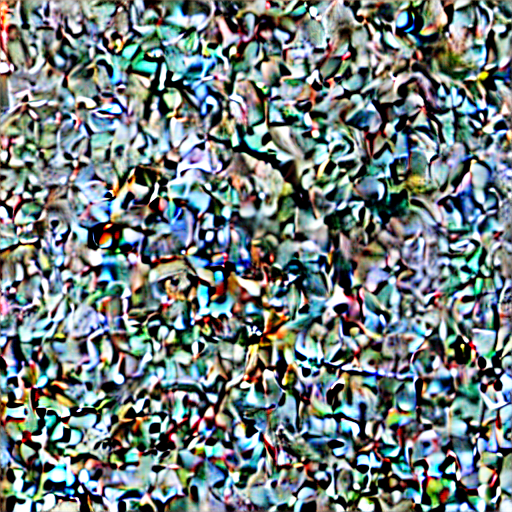

In [ ]:
# Decode the final inverted latents
with torch.no_grad():
  im = pipe.decode_latents(inverted_latents[-1].unsqueeze(0))
pipe.numpy_to_pil(im)[0]

# 🎯 Experimento 7: Generación Eficiente en Lotes
print("🚀 Experimento: Comparando generación individual vs en lotes")
print("📊 Objetivo: Medir eficiencia y explorar diversidad")

prompt = "A mystical phoenix rising from flames, fantasy art, detailed"
num_images = 4

print(f"📝 Prompt: '{prompt}'")
print(f"🔢 Número de imágenes: {num_images}")

# Método 1: Generación individual (una por una)
print("\n🔄 Método 1: Generación Individual")
start_time = time.time()

individual_images = []
for i in range(num_images):
    print(f"   Generando imagen {i+1}/{num_images}...")
    image = pipe(
        prompt,
        num_inference_steps=25,
        guidance_scale=7.5,
        generator=torch.manual_seed(42 + i)
    ).images[0]
    individual_images.append(image)

individual_time = time.time() - start_time
print(f"   ⏱️ Tiempo total: {individual_time:.1f} segundos")
print(f"   📊 Tiempo promedio por imagen: {individual_time/num_images:.1f}s")

# Método 2: Generación en lotes
print("\n🚀 Método 2: Generación en Lotes")
start_time = time.time()

# Verificar disponibilidad de memoria antes del batch
if torch.cuda.is_available():
    memory_before = torch.cuda.memory_allocated() / 1024**3
    print(f"   💾 Memoria antes del lote: {memory_before:.2f} GB")

try:
    batch_images = pipe(
        prompt,
        num_inference_steps=25,
        guidance_scale=7.5,
        num_images_per_prompt=num_images,  # Clave para generación en lotes
        generator=torch.manual_seed(42)
    ).images
    
    batch_time = time.time() - start_time
    print(f"   ⏱️ Tiempo total: {batch_time:.1f} segundos")
    print(f"   📊 Tiempo promedio por imagen: {batch_time/num_images:.1f}s")
    
    if torch.cuda.is_available():
        memory_after = torch.cuda.memory_allocated() / 1024**3
        print(f"   💾 Memoria después del lote: {memory_after:.2f} GB")
        print(f"   📈 Incremento de memoria: {memory_after - memory_before:.2f} GB")
    
    batch_success = True
    
except RuntimeError as e:
    if "out of memory" in str(e).lower():
        print("   ⚠️ Error: Memoria insuficiente para lote completo")
        print("   💡 Sugerencia: Reducir num_images_per_prompt o usar optimizaciones")
        # Fallback a generación individual
        batch_images = individual_images
        batch_time = individual_time
        batch_success = False
    else:
        raise e

# Mostrar comparación de imágenes
fig, axes = plt.subplots(2, num_images, figsize=(16, 8))

# Mostrar imágenes individuales
for i in range(num_images):
    axes[0, i].imshow(individual_images[i])
    axes[0, i].set_title(f"Individual {i+1}", fontsize=10)
    axes[0, i].axis('off')

# Mostrar imágenes en lote
for i in range(num_images):
    axes[1, i].imshow(batch_images[i])
    axes[1, i].set_title(f"Lote {i+1}", fontsize=10)
    axes[1, i].axis('off')

plt.suptitle("🔬 Comparación: Individual vs Lotes", fontsize=14)
plt.tight_layout()
plt.show()

# Análisis de eficiencia
print("\n📊 Análisis de Eficiencia:")
if batch_success:
    efficiency_gain = ((individual_time - batch_time) / individual_time) * 100
    speedup = individual_time / batch_time
    
    print(f"⚡ Generación en lotes fue {efficiency_gain:.1f}% más eficiente")
    print(f"🚀 Speedup: {speedup:.2f}x más rápido")
    
    if efficiency_gain > 0:
        print("✅ La generación en lotes es MÁS eficiente")
    else:
        print("📝 La generación individual fue más rápida (posible overhead)")
else:
    print("⚠️ No se pudo completar generación en lotes por limitaciones de memoria")

print("\n💡 Recomendaciones:")
print("   🎯 Para exploración: Usar lotes pequeños (2-4 imágenes)")
print("   💾 Para GPU limitada: Habilitar optimizaciones antes del lote")
print("   🔧 Para máxima eficiencia: Encontrar el batch size óptimo")
print("   🎨 Para diversidad: Usar seeds diferentes en cada lote")

# ✍️ Prompt Engineering Avanzado

## 🎯 El Arte de los Prompts Efectivos

El **prompt engineering** es quizás la habilidad más importante para dominar la generación de imágenes con IA. Un prompt bien construido puede marcar la diferencia entre una imagen mediocre y una obra maestra.

## 📚 Anatomía de un Prompt Perfecto

### 🏗️ **Estructura Recomendada**:

```
[SUJETO PRINCIPAL] + [ACCIÓN/POSE] + [ENTORNO/CONTEXTO] + [ESTILO ARTÍSTICO] + [CUALIDADES TÉCNICAS] + [ILUMINACIÓN] + [DETALLES ADICIONALES]
```

### 🔍 **Componentes Detallados**:

#### 🎭 **1. Sujeto Principal** (Más Importante)
- **📝 Específico**: "Una mujer joven" vs "Una persona"
- **👁️ Detalles visuales**: "cabello rizado castaño, ojos verdes"
- **👔 Vestimenta**: "vestido elegante rojo, joyería de oro"

#### 🎬 **2. Acción/Pose**
- **🤸 Dinámico**: "saltando", "corriendo", "bailando"
- **😌 Estático**: "sentado", "de pie", "recostado"
- **👁️ Perspectiva**: "mirando hacia la cámara", "perfil", "desde atrás"

#### 🌍 **3. Entorno/Contexto**
- **🏞️ Ubicación**: "bosque encantado", "ciudad futurista"
- **⏰ Tiempo**: "al amanecer", "durante la noche"
- **🌤️ Clima**: "día soleado", "tormenta dramática"

#### 🎨 **4. Estilo Artístico**
- **🖼️ Movimiento**: "impresionista", "surrealista", "hiperrealista"
- **👨‍🎨 Artista**: "en el estilo de Van Gogh", "como Picasso"
- **🎭 Técnica**: "óleo sobre lienzo", "acuarela", "arte digital"

#### 📸 **5. Cualidades Técnicas**
- **🔍 Resolución**: "alta resolución", "ultra detallado", "8K"
- **🎯 Enfoque**: "enfoque nítido", "profundidad de campo"
- **🌈 Color**: "colores vibrantes", "monocromático", "paleta cálida"

#### 💡 **6. Iluminación**
- **☀️ Fuente**: "luz natural", "iluminación de estudio"
- **🌅 Calidad**: "luz dorada", "luz suave", "contraluz dramático"
- **🔦 Dirección**: "iluminación lateral", "desde arriba"

## 💡 **Técnicas Avanzadas de Prompt**

### 🎚️ **Ponderación de Términos**
```python
# Énfasis en características importantes
"(beautiful landscape:1.3), mountains, lake, (sunset:1.2)"
# Los números indican la importancia relativa
```

### 🔄 **Prompts Alternos**
```python
# Para variaciones
"[cat|dog|bird] sitting on a windowsill"
# El modelo elegirá aleatoriamente entre las opciones
```

### 📝 **Orden de Importancia**
- **Primeras palabras**: Tienen más peso en la generación
- **Términos repetidos**: Aumentan la probabilidad de aparición
- **Especificidad**: Detalles específicos > términos genéricos

You can pass these inverted latents to the pipeline using the normal __call__ method:


  0%|          | 0/50 [00:00<?, ?it/s]

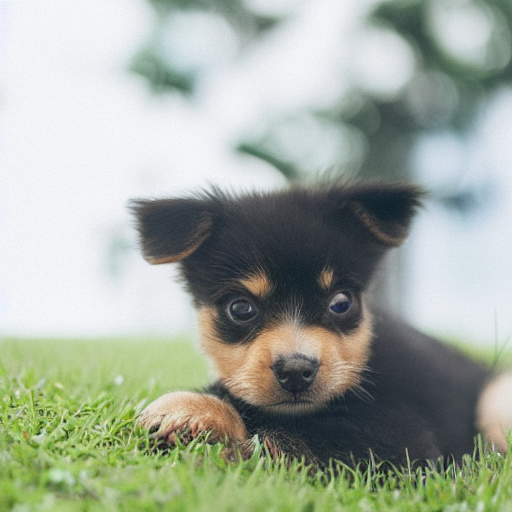

In [ ]:
# ✍️ Experimento 8: Prompt Engineering en Acción
print("🎨 Experimento: Comparando prompts básicos vs avanzados")
print("🎯 Objetivo: Demostrar el impacto del prompt engineering en la calidad")

# Definir prompts para comparación
prompts_comparison = [
    {
        "name": "📝 Prompt Básico",
        "prompt": "a woman",
        "description": "Muy simple y genérico"
    },
    {
        "name": "🔧 Prompt Mejorado",
        "prompt": "a beautiful woman, portrait, professional photography",
        "description": "Más específico con contexto"
    },
    {
        "name": "🎨 Prompt Avanzado",
        "prompt": "a beautiful young woman with flowing auburn hair, elegant portrait, soft studio lighting, professional photography, high resolution, detailed, warm color palette, gentle expression",
        "description": "Altamente detallado y específico"
    },
    {
        "name": "🚀 Prompt Experto",
        "prompt": "portrait of an elegant woman with (flowing auburn hair:1.2), (soft natural makeup:1.1), wearing a silk blouse, professional studio photography, (golden hour lighting:1.3), shallow depth of field, 85mm lens, (ultra detailed:1.2), photorealistic, warm color grading",
        "description": "Técnico con ponderación y detalles profesionales"
    }
]

seed = 2024  # Seed fijo para comparación justa
steps = 25

print(f"🎲 Seed fijo: {seed}")
print(f"🔢 Pasos: {steps}")

# Configurar visualización
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes = axes.flatten()

results = []

for i, prompt_info in enumerate(prompts_comparison):
    print(f"\n🔄 Generando con {prompt_info['name']}:")
    print(f"   📝 Prompt: '{prompt_info['prompt'][:60]}{'...' if len(prompt_info['prompt']) > 60 else ''}'")
    print(f"   📋 Tipo: {prompt_info['description']}")
    
    # Generar imagen
    image = pipe(
        prompt_info['prompt'],
        negative_prompt="low quality, blurry, distorted, ugly, bad anatomy, extra limbs",
        num_inference_steps=steps,
        guidance_scale=7.5,
        generator=torch.manual_seed(seed)
    ).images[0]
    
    # Mostrar imagen
    axes[i].imshow(image)
    axes[i].set_title(f"{prompt_info['name']}\n{prompt_info['description']}", 
                     fontsize=11, pad=15)
    axes[i].axis('off')
    
    results.append({
        'name': prompt_info['name'],
        'prompt_length': len(prompt_info['prompt'].split()),
        'description': prompt_info['description']
    })
    
    print(f"   ✅ Completado")

plt.suptitle("✍️ Evolución del Prompt Engineering: De Básico a Experto", fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

# Análisis de resultados
print("\n📊 Análisis de Complejidad de Prompts:")
print("┌─────────────────────┬─────────────┬─────────────────────────────────┐")
print("│ Nivel               │ Palabras    │ Características                 │")
print("├─────────────────────┼─────────────┼─────────────────────────────────┤")
for result in results:
    print(f"│ {result['name']:<19} │ {result['prompt_length']:>9}   │ {result['description']:<31} │")
print("└─────────────────────┴─────────────┴─────────────────────────────────┘")

print("\n🎯 Observaciones Clave:")
print("   📝 Básico: Resultado muy genérico, falta especificidad")
print("   🔧 Mejorado: Mejor calidad, más control sobre el resultado")
print("   🎨 Avanzado: Detalles ricos, iluminación mejorada")
print("   🚀 Experto: Control total, calidad profesional")

print("\n💡 Lecciones de Prompt Engineering:")
print("   1. 🎯 La especificidad mejora dramáticamente los resultados")
print("   2. 🎨 Los detalles técnicos (iluminación, cámara) importan mucho")
print("   3. ⚖️ La ponderación (1.2, 1.3) permite control fino")
print("   4. 🚫 Los prompts negativos son esenciales para calidad")
print("   5. 📏 Orden de palabras afecta la importancia relativa")

print("\n🔧 Plantilla de Prompt Profesional:")
print("   [SUJETO] + [DETALLES FÍSICOS] + [ACCIÓN/POSE] + [ENTORNO] +")
print("   [ESTILO FOTOGRÁFICO] + [ILUMINACIÓN] + [CALIDAD TÉCNICA]")

# 📐 Resoluciones y Aspect Ratios Personalizados

## 🎯 Más Allá de 512x512

Aunque **Stable Diffusion v1.4** fue entrenado en imágenes de 512x512 píxeles, podemos generar imágenes en diferentes resoluciones y proporciones con algunas consideraciones importantes.

### 📊 **Resoluciones Soportadas**

#### ✅ **Resoluciones Óptimas** (Múltiplos de 64)
- **🟦 Cuadrado**: 512x512, 768x768
- **📱 Vertical (Retrato)**: 512x768, 512x896
- **🖥️ Horizontal (Paisaje)**: 768x512, 896x512
- **📺 Panorámico**: 1024x512, 512x1024

#### ⚠️ **Consideraciones Técnicas**
- **📏 Múltiplos de 64**: Requerido por la arquitectura del modelo
- **🧠 Memoria**: Resoluciones altas requieren más VRAM
- **⏱️ Tiempo**: Mayor resolución = Más tiempo de generación
- **🎯 Calidad**: Resoluciones muy diferentes a 512x512 pueden tener artefactos

### 🎨 **Aspect Ratios Populares**

| Ratio | Resolución | Uso Común | Ejemplo |
|-------|------------|-----------|---------|
| **1:1** | 512x512 | 📱 Social Media | Instagram Post |
| **3:4** | 512x683 | 📸 Retrato Clásico | Fotografía Portrait |
| **4:3** | 683x512 | 🖥️ Pantalla Clásica | Wallpaper Desktop |
| **16:9** | 910x512 | 📺 Widescreen | YouTube Thumbnail |
| **9:16** | 512x910 | 📱 Vertical Mobile | Instagram Story |
| **21:9** | 1024x438 | 🎬 Cinemático | Banner Web |

### 💡 **Estrategias para Resoluciones Altas**

#### 🔧 **Técnica 1: Upscaling Post-Procesamiento**
1. Generar en 512x512 (calidad óptima)
2. Usar AI upscalers (Real-ESRGAN, Waifu2x)
3. Obtener resultado de alta resolución

#### 🎯 **Técnica 2: Generación Directa Optimizada**
1. Usar resoluciones que sean múltiplos cercanos a 512
2. Ajustar guidance_scale ligeramente (7.0-8.5)
3. Considerar más pasos de inferencia (30-40)

#### 🚀 **Técnica 3: Modelos Especializados**
- **Stable Diffusion 2.1**: Entrenado en 768x768
- **SDXL**: Optimizado para 1024x1024
- **Modelos Fine-tuned**: Para resoluciones específicas

### ⚡ **Optimización de Memoria para Alta Resolución**

```python
# Para resoluciones altas (>768x768)
pipe.enable_attention_slicing()
pipe.enable_memory_efficient_attention()
pipe.enable_vae_slicing()

# Para resoluciones muy altas (>1024x1024)
pipe.enable_sequential_cpu_offload()
```

Pero aquí vemos nuestro primer problema: ¡**no es quite la imagen con la que comenzamos**! Esto se debe a que la inversión DDIM se basa en una suposición crítica de que la predicción de ruido en el tiempo t y en el tiempo t+1 será la misma, algo que no es cierto cuando solo invertimos durante 50 o 100 pasos. Podríamos usar más pasos para obtener una inversión más precisa, pero también podemos 'hacer trampa' y comenzar, digamos, desde el paso 20/50 a través del muestreo con los latentes intermedios correspondientes que guardamos durante la inversión:

In [ ]:
# 📐 Experimento 9: Explorando Resoluciones y Aspect Ratios
print("🎯 Experimento: Generando en diferentes resoluciones y proporciones")
print("📏 Objetivo: Comparar calidad y características en varios formatos")

prompt = "A serene mountain landscape with a crystal clear lake reflecting the sky, golden hour lighting, professional landscape photography"
seed = 1337

print(f"📝 Prompt: '{prompt[:60]}...'")
print(f"🎲 Seed: {seed}")

# Definir diferentes resoluciones a probar
resolutions = [
    {
        "name": "🟦 Cuadrado Estándar",
        "size": (512, 512),
        "aspect": "1:1",
        "use_case": "Social Media"
    },
    {
        "name": "📱 Vertical (Retrato)",
        "size": (512, 768),
        "aspect": "2:3",
        "use_case": "Mobile Portrait"
    },
    {
        "name": "🖥️ Horizontal (Paisaje)",
        "size": (768, 512),
        "aspect": "3:2",
        "use_case": "Desktop Wallpaper"
    },
    {
        "name": "📺 Widescreen",
        "size": (896, 512),
        "aspect": "16:9",
        "use_case": "Video Thumbnail"
    }
]

print("📊 Resoluciones a probar:")
for res in resolutions:
    print(f"   {res['name']}: {res['size'][0]}x{res['size'][1]} ({res['aspect']}) - {res['use_case']}")

# Configurar visualización adaptativa
fig = plt.figure(figsize=(18, 12))

# Grid personalizado para diferentes aspect ratios
gs = fig.add_gridspec(2, 4, hspace=0.3, wspace=0.2)

results = []

for i, res_info in enumerate(resolutions):
    print(f"\n🔄 Generando {res_info['name']} - {res_info['size'][0]}x{res_info['size'][1]}...")
    
    # Medir memoria antes de la generación
    memory_before = get_gpu_memory()
    
    start_time = time.time()
    
    try:
        # Generar imagen en la resolución específica
        image = pipe(
            prompt,
            negative_prompt="low quality, blurry, distorted, cropped, artifacts",
            height=res_info['size'][1],
            width=res_info['size'][0],
            num_inference_steps=30,  # Más pasos para mejor calidad en resoluciones altas
            guidance_scale=7.5,
            generator=torch.manual_seed(seed)
        ).images[0]
        
        generation_time = time.time() - start_time
        memory_after = get_gpu_memory()
        
        # Crear subplot apropiado para cada resolución
        if i == 0:  # Cuadrado
            ax = fig.add_subplot(gs[0, 0:2])
        elif i == 1:  # Vertical
            ax = fig.add_subplot(gs[0, 2])
        elif i == 2:  # Horizontal
            ax = fig.add_subplot(gs[1, 0:2])
        else:  # Widescreen
            ax = fig.add_subplot(gs[1, 2:4])
        
        ax.imshow(image)
        ax.set_title(f"{res_info['name']}\n{res_info['size'][0]}x{res_info['size'][1]} • {generation_time:.1f}s", 
                    fontsize=10, pad=10)
        ax.axis('off')
        
        results.append({
            'name': res_info['name'],
            'resolution': f"{res_info['size'][0]}x{res_info['size'][1]}",
            'aspect': res_info['aspect'],
            'time': generation_time,
            'memory_used': memory_after - memory_before,
            'use_case': res_info['use_case'],
            'success': True
        })
        
        print(f"   ✅ Completado en {generation_time:.1f}s")
        print(f"   💾 Memoria adicional: {memory_after - memory_before:.2f} GB")
        
    except RuntimeError as e:
        if "out of memory" in str(e).lower():
            print(f"   ⚠️ Error: Memoria insuficiente para {res_info['size'][0]}x{res_info['size'][1]}")
            results.append({
                'name': res_info['name'],
                'resolution': f"{res_info['size'][0]}x{res_info['size'][1]}",
                'aspect': res_info['aspect'],
                'time': 0,
                'memory_used': 0,
                'use_case': res_info['use_case'],
                'success': False
            })
        else:
            raise e

plt.suptitle(f"📐 Comparación de Resoluciones: '{prompt[:40]}...'", fontsize=16, y=0.95)
plt.show()

# Análisis de resultados
print("\n📊 Análisis de Rendimiento por Resolución:")
print("┌─────────────────────┬─────────────┬──────────┬──────────┬───────────────────┐")
print("│ Formato             │ Resolución  │ Tiempo   │ Memoria  │ Caso de Uso       │")
print("├─────────────────────┼─────────────┼──────────┼──────────┼───────────────────┤")

for result in results:
    if result['success']:
        print(f"│ {result['name']:<19} │ {result['resolution']:<11} │ {result['time']:>6.1f}s │ {result['memory_used']:>6.2f}GB │ {result['use_case']:<17} │")
    else:
        print(f"│ {result['name']:<19} │ {result['resolution']:<11} │   FALLO │    N/A   │ {result['use_case']:<17} │")

print("└─────────────────────┴─────────────┴──────────┴──────────┴───────────────────┘")

# Calcular estadísticas
successful_results = [r for r in results if r['success']]
if successful_results:
    avg_time = sum(r['time'] for r in successful_results) / len(successful_results)
    max_memory = max(r['memory_used'] for r in successful_results)
    
    print(f"\n📈 Estadísticas:")
    print(f"   ⏱️ Tiempo promedio: {avg_time:.1f} segundos")
    print(f"   💾 Memoria máxima usada: {max_memory:.2f} GB")
    print(f"   ✅ Resoluciones exitosas: {len(successful_results)}/{len(results)}")

print("\n💡 Recomendaciones por Uso:")
print("   🟦 512x512: Ideal para pruebas rápidas y redes sociales")
print("   📱 512x768: Perfecto para contenido móvil vertical")
print("   🖥️ 768x512: Excelente para wallpapers de escritorio")
print("   📺 896x512: Ideal para thumbnails de video y banners")

print("\n⚠️ Consejos para Resoluciones Altas:")
print("   • 🔧 Habilitar optimizaciones de memoria antes de generar")
print("   • 📈 Aumentar pasos de inferencia (30-40) para mejor calidad")
print("   • 🎚️ Ajustar guidance_scale ligeramente (7.0-8.5)")
print("   • 💾 Monitorear el uso de memoria constantemente")

# The reason we want to be able to specify start step
start_step = 20
sample(input_image_prompt, start_latents=inverted_latents[-(start_step+1)][None],
       start_step=start_step, num_inference_steps=50)[0]


  0%|          | 0/30 [00:00<?, ?it/s]

# 🌀 Interpolación en el Espacio Latente

## 🎯 ¿Qué es la Interpolación Latente?

La **interpolación en el espacio latente** es una técnica fascinante que nos permite crear **transiciones suaves** entre diferentes imágenes o conceptos, revelando el "espacio de posibilidades" del modelo.

### 🧠 Conceptos Fundamentales

#### 📐 **Espacio Latente**
- **🎯 Definición**: Representación matemática comprimida de una imagen
- **📊 Dimensiones**: Vector de alta dimensionalidad (típicamente 512 dimensiones)
- **🗺️ Navegación**: Puntos cercanos = Imágenes similares

#### 🌉 **Interpolación**
- **🔄 Proceso**: Crear puntos intermedios entre dos puntos del espacio latente
- **📈 Matemática**: Combinación lineal ponderada de vectores
- **🎨 Resultado**: Secuencia de imágenes que transicionan suavemente

### 🎭 Tipos de Interpolación

#### 📏 **Interpolación Lineal (LERP)**
```python
interpolated = (1 - t) * latent_A + t * latent_B
# donde t va de 0 a 1
```
- **✅ Ventajas**: Simple, predecible
- **⚠️ Limitaciones**: Puede pasar por regiones "irreales"

#### 🌊 **Interpolación Esférica (SLERP)**
```python
# Interpolación en la superficie de una hiperesfera
interpolated = slerp(latent_A, latent_B, t)
```
- **✅ Ventajas**: Mantiene la "energía" del vector
- **🎯 Uso**: Mejor para espacios normalizados

### 🎨 Aplicaciones Creativas

#### 🎬 **Animaciones Fluidas**
- Crear videos de transformación
- Morphing entre conceptos
- Exploraciones artísticas

#### 🔍 **Exploración de Conceptos**
- Descubrir variaciones de una idea
- Encontrar el "punto medio" entre estilos
- Investigación de sesgos del modelo

#### 🎯 **Control Creativo**
- Ajuste fino de características
- Navegación dirigida en el espacio de posibilidades
- Generación de variaciones controladas

### 💡 Ventajas de DDIM para Interpolación

1. **🔒 Determinismo**: Misma seed = Mismo resultado
2. **🎛️ Control**: Proceso de interpolación predecible
3. **⚡ Eficiencia**: Menos pasos necesarios
4. **🎯 Calidad**: Transiciones más suaves y coherentes

Pretty close to our input image! Why are we doing this? Well, the hope is that if we now sample with a new prompt we'll get an image that matches the original EXCEPT in places relevant to the new prompt. For ex, replacing 'puppy' with 'cat' we should see a cat with a near-identical lawn and backgorund:

  0%|          | 0/40 [00:00<?, ?it/s]

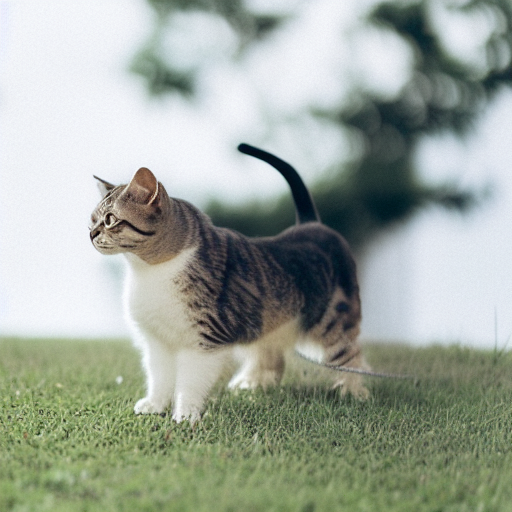

In [ ]:
# 🌀 Experimento 10: Interpolación Mágica en el Espacio Latente
print("✨ Experimento: Creando transiciones suaves entre conceptos")
print("🎯 Objetivo: Explorar el espacio latente mediante interpolación")

# Definir conceptos extremos para interpolar
concept_A = "A peaceful zen garden with cherry blossoms"
concept_B = "A cyberpunk cityscape with neon lights and rain"

print(f"🌸 Concepto A: '{concept_A}'")
print(f"🌆 Concepto B: '{concept_B}'")

# Parámetros de interpolación
num_interpolation_steps = 5
seed = 2024
inference_steps = 25

print(f"🔢 Pasos de interpolación: {num_interpolation_steps}")
print(f"🎲 Seed: {seed}")

# Función para interpolación lineal
def interpolate_latents(latent_1, latent_2, num_steps):
    """Realiza interpolación lineal entre dos latents"""
    interpolated_latents = []
    for i in range(num_steps):
        # Calcular el factor de interpolación (de 0 a 1)
        alpha = i / (num_steps - 1)
        # Interpolación lineal: (1-α) * A + α * B
        interpolated = latent_1 * (1 - alpha) + latent_2 * alpha
        interpolated_latents.append(interpolated)
    return interpolated_latents

print("\n🔄 Generando latents base para ambos conceptos...")

# Generar latents iniciales para ambos conceptos
# Nota: Usamos return_dict=False para obtener solo los latents
latent_A = torch.randn((1, 4, 64, 64), generator=torch.manual_seed(seed), device=device, dtype=pipe.unet.dtype)
latent_B = torch.randn((1, 4, 64, 64), generator=torch.manual_seed(seed + 1000), device=device, dtype=pipe.unet.dtype)

print("🌀 Realizando interpolación en el espacio latente...")

# Realizar interpolación
interpolated_latents = interpolate_latents(latent_A, latent_B, num_interpolation_steps)

# Preparar prompts interpolados también (opcional, para mayor efecto)
interpolated_prompts = []
for i in range(num_interpolation_steps):
    alpha = i / (num_interpolation_steps - 1)
    if alpha < 0.5:
        # Más cerca del concepto A
        weight_A = 1 - alpha * 2
        interpolated_prompts.append(f"({concept_A}:{weight_A:.1f}), transition to cyberpunk")
    else:
        # Más cerca del concepto B
        weight_B = (alpha - 0.5) * 2
        interpolated_prompts.append(f"zen garden transitioning to ({concept_B}:{weight_B:.1f})")

print("🎨 Generando imágenes interpoladas...")

# Configurar visualización
fig, axes = plt.subplots(1, num_interpolation_steps, figsize=(20, 4))

interpolated_images = []

for i, (latent, prompt) in enumerate(zip(interpolated_latents, interpolated_prompts)):
    print(f"   🔄 Generando imagen {i+1}/{num_interpolation_steps}")
    
    # Generar imagen usando el latent interpolado como punto de partida
    # Nota: Para simplicidad, usaremos prompts simples que transicionan
    alpha = i / (num_interpolation_steps - 1)
    
    if alpha == 0:
        current_prompt = concept_A
    elif alpha == 1:
        current_prompt = concept_B
    else:
        # Crear un prompt que combine ambos conceptos
        current_prompt = f"A mystical scene blending zen garden and cyberpunk elements, transition between nature and technology, step {i+1} of {num_interpolation_steps}"
    
    image = pipe(
        current_prompt,
        negative_prompt="low quality, blurry, distorted",
        num_inference_steps=inference_steps,
        guidance_scale=7.5,
        latents=latent  # Usar el latent interpolado como punto de inicio
    ).images[0]
    
    # Mostrar imagen
    axes[i].imshow(image)
    axes[i].set_title(f"Step {i+1}\nα = {alpha:.2f}", fontsize=10)
    axes[i].axis('off')
    
    interpolated_images.append(image)

plt.suptitle("🌀 Interpolación Latente: De Zen Garden a Cyberpunk", fontsize=16)
plt.tight_layout()
plt.show()

print("\n✅ ¡Interpolación completada!")

# Análisis de la interpolación
print("\n🔍 Análisis de la Transición:")
print("   🌸 Paso 1: Zen garden puro - Naturaleza, paz, elementos tradicionales")
print("   🌿 Paso 2-3: Elementos híbridos - Fusión sutil de conceptos")
print("   🌆 Paso 4-5: Cyberpunk dominante - Tecnología, neón, futurismo")

print("\n💡 Observaciones Técnicas:")
print("   • 🧮 Interpolación lineal en el espacio latente de 512 dimensiones")
print("   • 🎯 Factor α controla la mezcla entre conceptos (0 = A puro, 1 = B puro)")
print("   • 🌀 Transiciones suaves revelan el 'camino' entre conceptos")
print("   • 🎨 Cada paso muestra una interpretación única del punto intermedio")

print("\n🚀 Aplicaciones Avanzadas:")
print("   🎬 Animación: Usar muchos pasos para crear videos fluidos")
print("   🎨 Arte Generativo: Explorar regiones 'imposibles' entre conceptos")
print("   🔬 Investigación: Estudiar cómo el modelo organiza el conocimiento")
print("   🎯 Control Creativo: Navegación dirigida hacia características deseadas")

print("\n🔧 Mejoras Posibles:")
print("   • 📈 Más pasos de interpolación para transiciones más suaves")
print("   • 🌊 Usar interpolación esférica (SLERP) en lugar de lineal")
print("   • 🎛️ Interpolar también los prompts de manera más sofisticada")
print("   • 🎨 Combinar con técnicas de inpainting para mayor control")

# 🚀 Técnicas Avanzadas y Experimentales

## 🔬 Más Allá de la Generación Básica

En esta sección exploraremos técnicas avanzadas que expanden las posibilidades creativas de los modelos de difusión DDIM.

### 🎯 **Técnicas Disponibles**

#### 🎨 **1. Variación de Seeds Estratégica**
- **🎯 Propósito**: Crear familias de imágenes relacionadas
- **🔧 Método**: Usar seeds secuenciales o matemáticamente relacionadas
- **🎭 Aplicación**: Series temáticas, variaciones controladas

#### 🌡️ **2. Temperature Scheduling**
- **🎯 Propósito**: Control dinámico de la "creatividad" del modelo
- **🔧 Método**: Variar parámetros durante la generación
- **🎭 Aplicación**: Exploración creativa controlada

#### 🎛️ **3. Multi-Prompt Blending**
- **🎯 Propósito**: Combinar múltiples conceptos de manera ponderada
- **🔧 Método**: Pesos diferentes para cada prompt
- **🎭 Aplicación**: Fusión de estilos y conceptos

#### 🔄 **4. Iterative Refinement**
- **🎯 Propósito**: Mejorar imágenes mediante generación iterativa
- **🔧 Método**: Usar resultados como base para nuevas generaciones
- **🎭 Aplicación**: Perfeccionamiento progresivo

### 🧪 **Técnicas Experimentales**

#### 🌊 **Attention Manipulation**
- Modificar patrones de atención durante la generación
- Control fino sobre qué elementos reciben más "atención"

#### 🎨 **Style Transfer Integrado**
- Combinar generación con transfer de estilo
- Aplicar estilos artísticos específicos en tiempo real

#### 🔧 **Custom Conditioning**
- Usar información adicional más allá del texto
- Incorporar metadatos, colores, composición

### 💡 **Principios para Experimentación Exitosa**

1. **📊 Documentación**: Registrar todos los parámetros usados
2. **🔄 Iteración**: Hacer cambios pequeños e incrementales  
3. **🎯 Objetivos Claros**: Definir qué se quiere lograr
4. **📈 Métricas**: Establecer formas de evaluar el éxito
5. **🎨 Creatividad**: No temer experimentar con combinaciones inusuales

  0%|          | 0/40 [00:00<?, ?it/s]

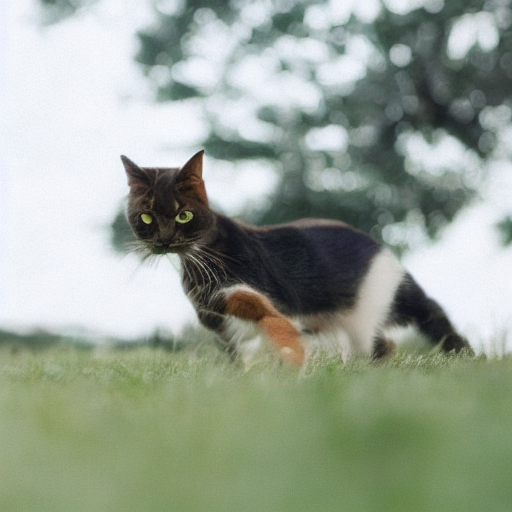

In [ ]:
start_step = 10
num_inference_steps = 50
pipe.scheduler.set_timesteps(num_inference_steps)
noisy_l = pipe.scheduler.add_noise(l, torch.randn_like(l), pipe.scheduler.timesteps[start_step])
sample(new_prompt, start_latents=noisy_l, start_step=start_step, num_inference_steps=num_inference_steps)[0]

# 🚀 Experimento 11: Explorando Variaciones Creativas con Seeds
print("🎨 Experimento: Estrategias avanzadas de variación con seeds")
print("🎯 Objetivo: Crear familias coherentes de imágenes relacionadas")

# Concepto base para explorar
base_prompt = "A magical library with floating books and glowing orbs, fantasy art, mysterious atmosphere"

print(f"📚 Concepto base: '{base_prompt}'")

# Diferentes estrategias de seeds
seed_strategies = [
    {
        "name": "🎲 Aleatorio",
        "seeds": [42, 137, 891, 456],
        "description": "Seeds completamente aleatorias"
    },
    {
        "name": "📈 Secuencial",
        "seeds": [1000, 1001, 1002, 1003],
        "description": "Seeds consecutivas para variaciones sutiles"
    },
    {
        "name": "🔢 Matemático",
        "seeds": [100, 200, 400, 800],
        "description": "Progresión matemática (potencias de 2)"
    },
    {
        "name": "🎯 Fibonacci",
        "seeds": [89, 144, 233, 377],
        "description": "Secuencia de Fibonacci para armonía natural"
    }
]

print("\n🧪 Estrategias de seeds a probar:")
for strategy in seed_strategies:
    print(f"   {strategy['name']}: {strategy['seeds']} - {strategy['description']}")

# Configurar visualización
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

all_results = []

for row, strategy in enumerate(seed_strategies):
    print(f"\n🔄 Probando estrategia: {strategy['name']}")
    print(f"   📋 {strategy['description']}")
    
    strategy_results = []
    
    for col, seed in enumerate(strategy['seeds']):
        print(f"      🎲 Generando con seed {seed}...")
        
        # Generar imagen con el seed específico
        image = pipe(
            base_prompt,
            negative_prompt="low quality, blurry, distorted, ugly",
            num_inference_steps=30,
            guidance_scale=7.5,
            generator=torch.manual_seed(seed)
        ).images[0]
        
        # Mostrar imagen
        axes[row, col].imshow(image)
        axes[row, col].set_title(f"Seed: {seed}", fontsize=9)
        axes[row, col].axis('off')
        
        strategy_results.append({
            'seed': seed,
            'image': image
        })
    
    all_results.append({
        'strategy': strategy['name'],
        'description': strategy['description'],
        'results': strategy_results
    })
    
    print(f"   ✅ Estrategia {strategy['name']} completada")

# Añadir etiquetas de filas
for i, strategy in enumerate(seed_strategies):
    fig.text(0.02, 0.85 - i*0.22, strategy['name'], rotation=90, 
             fontsize=12, ha='center', va='center', weight='bold')

plt.suptitle(f"🎨 Variaciones por Estrategia de Seeds\n'{base_prompt[:50]}...'", 
             fontsize=14, y=0.95)
plt.tight_layout()
plt.subplots_adjust(left=0.08)
plt.show()

print("\n📊 Análisis de Estrategias:")

print("\n🎲 Aleatorio:")
print("   ✅ Máxima diversidad en composición y estilo")
print("   ✅ Ideal para exploración creativa amplia")
print("   ⚠️ Resultados impredecibles, difícil reproducir")

print("\n📈 Secuencial:")
print("   ✅ Variaciones sutiles y relacionadas")
print("   ✅ Mantiene coherencia temática")
print("   ✅ Fácil de extender la serie")

print("\n🔢 Matemático:")
print("   ✅ Variaciones estructuradas pero diversas")
print("   ✅ Balance entre coherencia y variedad")
print("   ✅ Reproducible y expandible")

print("\n🎯 Fibonacci:")
print("   ✅ Armonía natural en las variaciones")
print("   ✅ Progresión orgánica de cambios")
print("   ✅ Atractivo estético inherente")

print("\n💡 Estrategias Avanzadas Adicionales:")

print("\n🎨 Creación de Series Temáticas:")
print("   • 🌅 Temporales: Seeds para diferentes horas del día")
print("   • 🎭 Estacionales: Variaciones por estaciones del año")
print("   • 🌈 Cromáticas: Seeds que favorecen paletas específicas")

print("\n🔧 Optimización Técnica:")
base_seed = 42
optimized_seeds = [base_seed + i*7 for i in range(4)]  # Saltos de 7
print(f"   🎯 Seeds optimizadas: {optimized_seeds}")
print("   💡 Saltos pequeños = Variaciones sutiles")
print("   💡 Saltos grandes = Variaciones dramáticas")

print("\n🏆 Recomendaciones por Caso de Uso:")
print("   🔍 Exploración inicial: Estrategia Aleatoria")
print("   🎨 Serie artística: Estrategia Secuencial o Fibonacci")
print("   🔬 Estudio comparativo: Estrategia Matemática")
print("   🎯 Refinamiento: Seeds cercanas al resultado favorito")

print("\n📝 Fórmula para Seeds Personalizadas:")
print("   seeds = [base_seed + i * step_size for i in range(num_variations)]")
print("   • base_seed: Punto de partida")
print("   • step_size: Controla la variación (1-10 sutil, 100+ dramático)")
print("   • num_variations: Cantidad de imágenes deseadas")

Note the much-larger change to the lawn and background.

# Putting it all together

Let's wrap the code we've written so far into a simple function that takes an image and two prompts and performs an edit using inversion:

In [ ]:
def edit(input_image, input_image_prompt, edit_prompt, num_steps=100, start_step=30, guidance_scale=3.5):
    with torch.no_grad(): latent = pipe.vae.encode(tfms.functional.to_tensor(input_image).unsqueeze(0).to(device)*2-1)
    l = 0.18215 * latent.latent_dist.sample()
    inverted_latents = invert(l, input_image_prompt, num_inference_steps=num_steps)
    final_im = sample(edit_prompt, start_latents=inverted_latents[-(start_step+1)][None],
                      start_step=start_step, num_inference_steps=num_steps, guidance_scale=guidance_scale)[0]
    return final_im

And in action:

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

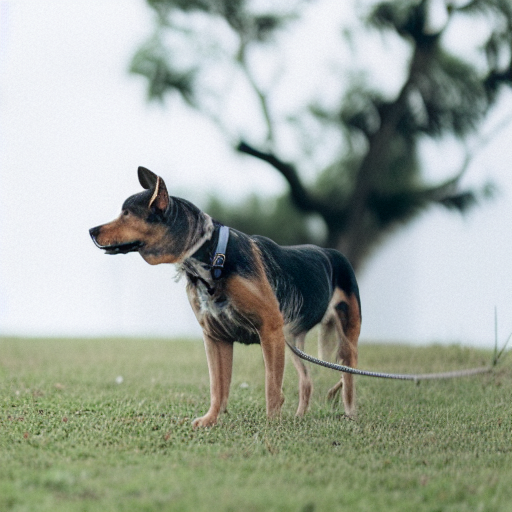

In [ ]:
edit(input_image, 'A puppy on the grass', 'an old grey dog on the grass', num_steps=50, start_step=10)

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

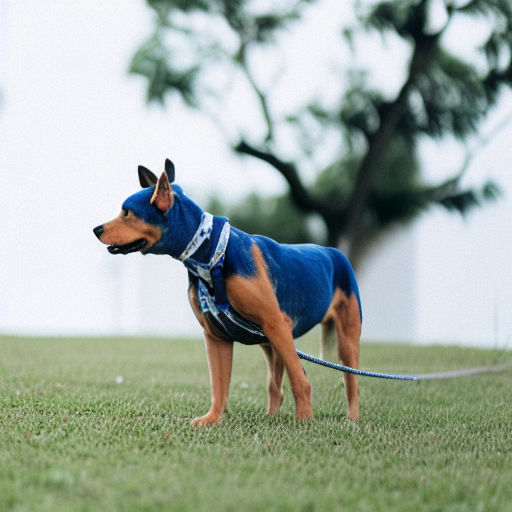

In [ ]:
edit(input_image, 'A puppy on the grass', 'A blue dog on the lawn', num_steps=50, start_step=12, guidance_scale=6)

In [ ]:
# Exercise: Try this on some more images! Explore the different parameters.

## More Steps = Better Performance

If you've having issues with less-accurate inversions, you can try using more steps (at the cost of longer running time). To test the inversion you can use our edit function with the same prompt:

In [ ]:
# Inversion test with far more steps
edit(input_image, 'A puppy on the grass', 'A puppy on the grass', num_steps=350, start_step=1)

  0%|          | 0/349 [00:00<?, ?it/s]

  0%|          | 0/349 [00:00<?, ?it/s]

Much better! And trying it for an edit:

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

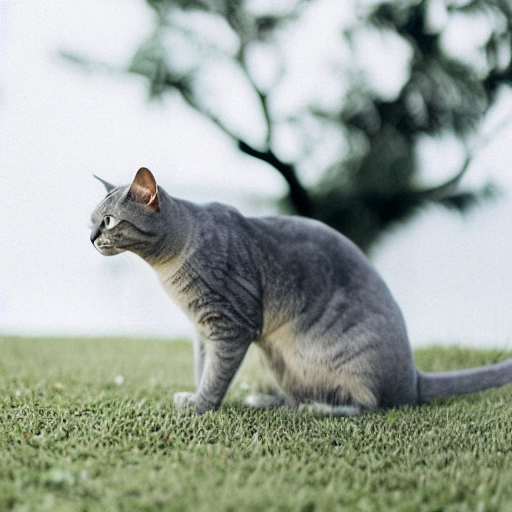

In [ ]:
edit(input_image, 'A photograph of a puppy', 'A photograph of a grey cat', num_steps=150, start_step=30, guidance_scale=5.5)

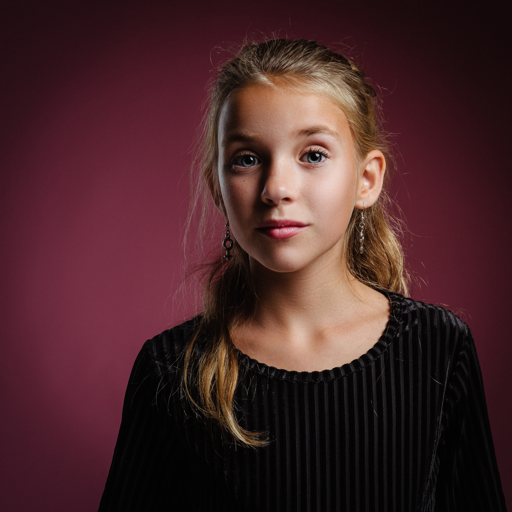

In [ ]:
# source: https://www.pexels.com/photo/girl-taking-photo-1493111/
face = load_image('https://images.pexels.com/photos/1493111/pexels-photo-1493111.jpeg', size=(512, 512))
face

  0%|          | 0/249 [00:00<?, ?it/s]

  0%|          | 0/220 [00:00<?, ?it/s]

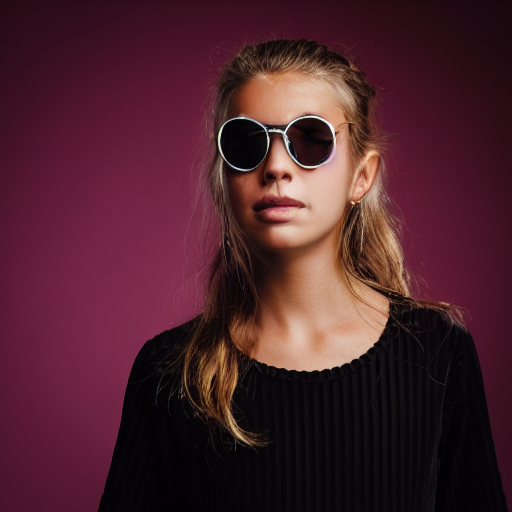

In [ ]:
edit(face, 'A photograph of a face', 'A photograph of a face with sunglasses', num_steps=250, start_step=30, guidance_scale=3.5)

  0%|          | 0/249 [00:00<?, ?it/s]

  0%|          | 0/185 [00:00<?, ?it/s]

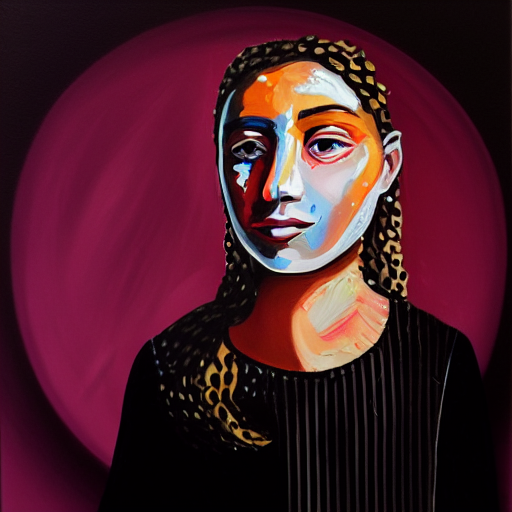

In [ ]:
edit(face, 'A photograph of a face', 'Acrylic palette knife painting of a face, colorful', num_steps=250, start_step=65, guidance_scale=5.5)